# K-Means y Variantes - RESUELTOS


---

Este cuaderno contiene ejercicios prácticos RESUELTOS para consolidar los conceptos del Módulo KMeans.


## Configuración Inicial

Ejecute esta celda antes de comenzar los ejercicios.

In [1]:
# Bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# Scikit-learn
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

# Reproducibilidad
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Configuración completada.")

Configuración completada.


---

## Ejercicio 1: Comprensión del Algoritmo K-Means

Para comprender en profundidad el funcionamiento de K-Means, es fundamental implementar manualmente los pasos del algoritmo y observar cómo evoluciona la función objetivo.

### Datos

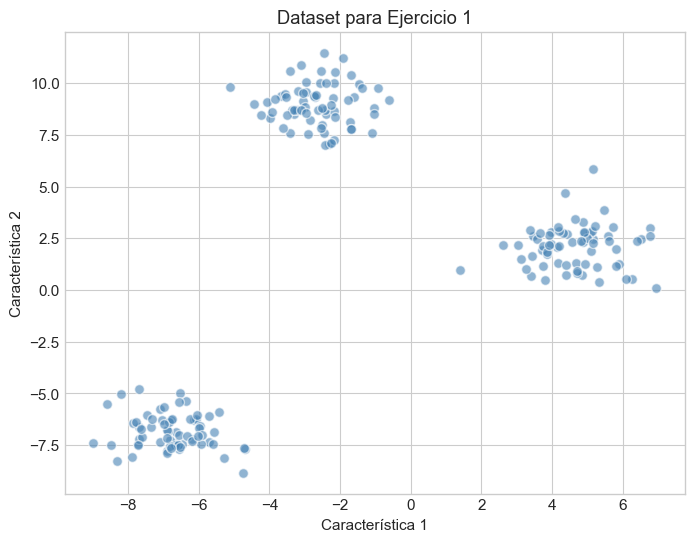

In [2]:
# Generación del dataset para el Ejercicio 1
X_ej1, y_ej1 = make_blobs(
    n_samples=200,
    n_features=2,
    centers=3,
    cluster_std=1.0,
    random_state=RANDOM_STATE
)

# Visualización inicial
plt.figure(figsize=(8, 6))
plt.scatter(X_ej1[:, 0], X_ej1[:, 1], c='steelblue', alpha=0.6, edgecolors='w', s=50)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Dataset para Ejercicio 1')
plt.show()

### Tarea 1.1: Cálculo de la Inercia (WCSS)

Implemente una función que calcule la inercia (Within-Cluster Sum of Squares) dados los datos, los centroides y las asignaciones de cluster.

$$J = \sum_{k=1}^{K} \sum_{x_i \in C_k} ||x_i - \mu_k||^2$$

In [3]:
def calcular_inercia(X, centroides, asignaciones):
    """
    Calcula la inercia (WCSS) del clustering.

    Parámetros
    ----------
    X : ndarray de forma (n_samples, n_features)
        Matriz de datos.
    centroides : ndarray de forma (k, n_features)
        Posiciones de los centroides.
    asignaciones : ndarray de forma (n_samples,)
        Índice del cluster asignado a cada punto.

    Retorna
    -------
    float
        Valor de la inercia.
    """
    # TODO: Implementar el cálculo de la inercia
    # Sugerencia: iterar sobre cada cluster, seleccionar los puntos asignados
    # y sumar las distancias al cuadrado al centroide correspondiente

    inercia = 0.0
    for k in range(len(centroides)):
      puntos_cluster = X[asignaciones == k]
      if len(puntos_cluster) > 0:
        inercia += np.sum((puntos_cluster - centroides[k]) ** 2)

    return inercia


# Verificación con datos de prueba
centroides_test = np.array([[0, 0], [5, 5], [10, 0]])
asignaciones_test = np.array([0, 0, 1, 1, 2, 2])
X_test = np.array([[0.1, 0.1], [-0.1, -0.1], [5.1, 5.1], [4.9, 4.9], [10.1, 0.1], [9.9, -0.1]])

inercia_calculada = calcular_inercia(X_test, centroides_test, asignaciones_test)
print(f"Inercia calculada: {inercia_calculada:.4f}")
print(f"Inercia esperada (aproximada): 0.12")

Inercia calculada: 0.1200
Inercia esperada (aproximada): 0.12


### Tarea 1.2: Paso de Asignación

Implemente el paso de asignación de K-Means, donde cada punto se asigna al centroide más cercano.

In [4]:
def asignar_clusters(X, centroides):
    """
    Asigna cada punto al centroide más cercano.

    Parámetros
    ----------
    X : ndarray de forma (n_samples, n_features)
        Matriz de datos.
    centroides : ndarray de forma (k, n_features)
        Posiciones de los centroides.

    Retorna
    -------
    ndarray de forma (n_samples,)
        Índice del cluster asignado a cada punto.
    """
    # TODO: Implementar el paso de asignación
    # Sugerencia: calcular la distancia de cada punto a cada centroide
    # y asignar al índice del centroide con menor distancia

    n_samples = X.shape[0]
    k = centroides.shape[0]

    asignaciones = np.zeros((n_samples, k))
    for j in range(k):
      asignaciones[:, j] = np.sqrt(np.sum((X - centroides[j]) ** 2, axis=1))

    return np.argmin(asignaciones, axis=1)

    #return asignaciones


# Verificación
asignaciones_calc = asignar_clusters(X_test, centroides_test)
print(f"Asignaciones calculadas: {asignaciones_calc}")
print(f"Asignaciones esperadas:  {asignaciones_test}")

Asignaciones calculadas: [0 0 1 1 2 2]
Asignaciones esperadas:  [0 0 1 1 2 2]


### Tarea 1.3: Paso de Actualización

Implemente el paso de actualización, donde cada centroide se recalcula como la media de los puntos asignados.

In [5]:
def actualizar_centroides(X, asignaciones, k):
    """
    Recalcula los centroides como la media de los puntos asignados.

    Parámetros
    ----------
    X : ndarray de forma (n_samples, n_features)
        Matriz de datos.
    asignaciones : ndarray de forma (n_samples,)
        Índice del cluster asignado a cada punto.
    k : int
        Número de clusters.

    Retorna
    -------
    ndarray de forma (k, n_features)
        Nuevas posiciones de los centroides.
    """
    # TODO: Implementar el paso de actualización
    # Sugerencia: para cada cluster, calcular la media de sus puntos

    n_features = X.shape[1]
    nuevos_centroides = np.zeros((k, n_features))

    for j in range(k):
        puntos_cluster = X[asignaciones == j]
        if len(puntos_cluster) > 0:
            nuevos_centroides[j] = puntos_cluster.mean(axis=0)

    return nuevos_centroides


# Verificación
nuevos_centroides = actualizar_centroides(X_test, asignaciones_test, 3)
print("Centroides actualizados:")
print(nuevos_centroides)

Centroides actualizados:
[[ 0.  0.]
 [ 5.  5.]
 [10.  0.]]


### Tarea 1.4: Algoritmo Completo

Utilizando las funciones anteriores, ejecute K-Means manualmente durante 5 iteraciones y registre la evolución de la inercia.

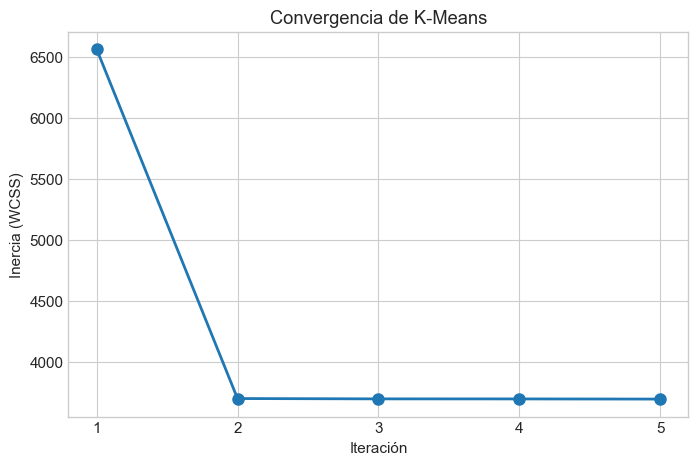

In [6]:
# TODO: Ejecutar K-Means manualmente
# 1. Inicializar centroides seleccionando 3 puntos aleatorios de X_ej1
# 2. Iterar 5 veces: asignar clusters, actualizar centroides, calcular inercia
# 3. Almacenar la inercia de cada iteración

k = 3
n_iteraciones = 5
historial_inercia = []

# Inicialización
np.random.seed(RANDOM_STATE)
indices_iniciales = np.random.choice(len(X_ej1), size=k, replace=False)
centroides = X_ej1[indices_iniciales].copy()

# Su código aquí: bucle de iteraciones
for i in range(n_iteraciones):
    asignaciones_sol = asignar_clusters(X_ej1, centroides)
    inercia_sol = calcular_inercia(X_ej1, centroides, asignaciones_sol)
    historial_inercia.append(inercia_sol)
    centroides = actualizar_centroides(X_ej1, asignaciones_sol, k)


# Visualización de la evolución de la inercia
if len(historial_inercia) > 0:
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(historial_inercia) + 1), historial_inercia, 'o-', linewidth=2, markersize=8)
    plt.xlabel('Iteración')
    plt.ylabel('Inercia (WCSS)')
    plt.title('Convergencia de K-Means')
    plt.xticks(range(1, len(historial_inercia) + 1))
    plt.show()

### Pregunta de Reflexión 1

Observe la evolución de la inercia a lo largo de las iteraciones:

1. ¿La inercia siempre decrece? ¿Por qué?
2. ¿Qué garantiza la convergencia del algoritmo?
3. ¿El resultado obtenido es el óptimo global? Justifique.

*Escriba su respuesta aquí:*

...

---

## Ejercicio 2: Impacto de la Inicialización

### Contexto

La inicialización de los centroides tiene un impacto significativo en el resultado final de K-Means. En este ejercicio, comparará la inicialización aleatoria con K-Means++.

### Datos

In [7]:
# Dataset para el Ejercicio 2
X_ej2, _ = make_blobs(
    n_samples=300,
    n_features=2,
    centers=5,
    cluster_std=0.9,
    random_state=RANDOM_STATE
)

### Tarea 2.1: Comparación de Inicializaciones

Ejecute K-Means 30 veces con cada tipo de inicialización (aleatoria y K-Means++) y compare las distribuciones de inercia resultantes.

Exception in thread Thread-4 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 107: invalid start byte
c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded

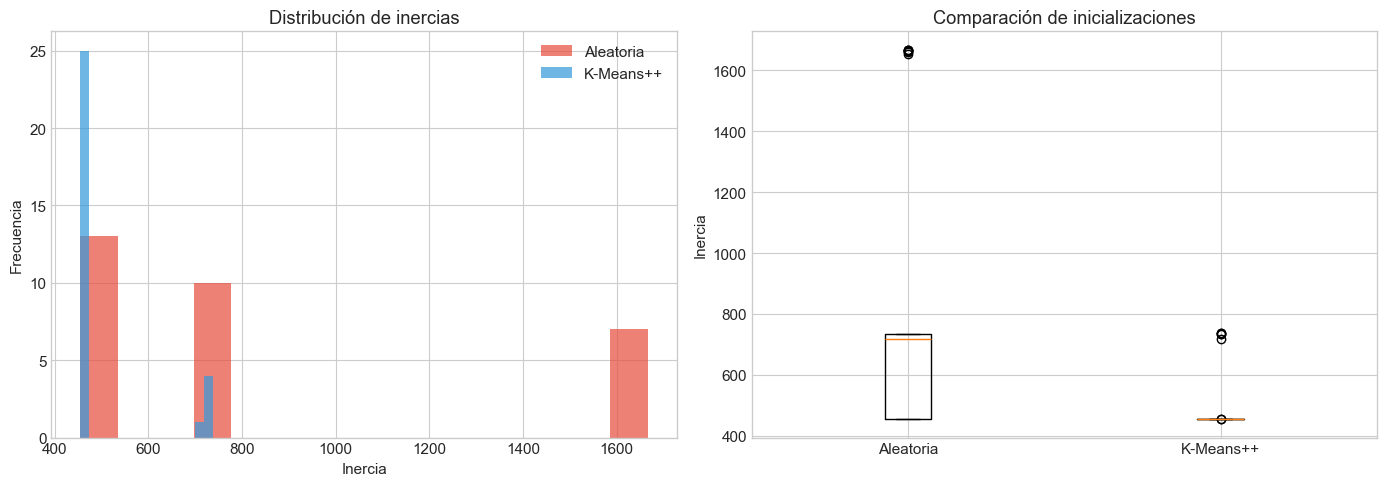


Estadísticas de inercia:
Método          Media        Std          Mín          Máx         
---------------------------------------------------------------
Aleatoria       826.79       476.28       454.10       1667.88     
K-Means++       500.53       103.73       454.10       738.77      


In [8]:
# TODO: Ejecutar experimento de comparación
n_experimentos = 30
k = 5

inercias_random = []
inercias_kmeanspp = []

# Su código aquí
# Para cada experimento:
#   - Ejecutar KMeans con init='random', n_init=1
#   - Ejecutar KMeans con init='k-means++', n_init=1
#   - Almacenar las inercias resultantes

for i in range(n_experimentos):
    # Su código aquí
    km_random = KMeans(n_clusters=k, init='random', n_init=1, random_state=i)
    km_random.fit(X_ej2)
    inercias_random.append(km_random.inertia_)

    km_pp = KMeans(n_clusters=k, init='k-means++', n_init=1, random_state=i)
    km_pp.fit(X_ej2)
    inercias_kmeanspp.append(km_pp.inertia_)
    pass

# Visualización
if len(inercias_random) > 0 and len(inercias_kmeanspp) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histograma
    axes[0].hist(inercias_random, bins=15, alpha=0.7, label='Aleatoria', color='#e74c3c')
    axes[0].hist(inercias_kmeanspp, bins=15, alpha=0.7, label='K-Means++', color='#3498db')
    axes[0].set_xlabel('Inercia')
    axes[0].set_ylabel('Frecuencia')
    axes[0].set_title('Distribución de inercias')
    axes[0].legend()

    # Boxplot
    axes[1].boxplot([inercias_random, inercias_kmeanspp], labels=['Aleatoria', 'K-Means++'])
    axes[1].set_ylabel('Inercia')
    axes[1].set_title('Comparación de inicializaciones')

    plt.tight_layout()
    plt.show()

    # Estadísticas
    print(f"\nEstadísticas de inercia:")
    print(f"{'Método':<15} {'Media':<12} {'Std':<12} {'Mín':<12} {'Máx':<12}")
    print("-" * 63)
    print(f"{'Aleatoria':<15} {np.mean(inercias_random):<12.2f} {np.std(inercias_random):<12.2f} {np.min(inercias_random):<12.2f} {np.max(inercias_random):<12.2f}")
    print(f"{'K-Means++':<15} {np.mean(inercias_kmeanspp):<12.2f} {np.std(inercias_kmeanspp):<12.2f} {np.min(inercias_kmeanspp):<12.2f} {np.max(inercias_kmeanspp):<12.2f}")

### Pregunta de Reflexión 2

Analice los resultados del experimento:

1. ¿Qué diferencias observa entre ambas inicializaciones en términos de media y varianza?
2. ¿Por qué K-Means++ tiende a producir mejores resultados?
3. ¿Cuál es el propósito del parámetro `n_init` en scikit-learn?

*Escriba su respuesta aquí:*

...

---

## Ejercicio 3: Selección del Número de Clusters

### Contexto

Uno de los principales desafíos de K-Means es determinar el número óptimo de clusters. En este ejercicio, aplicará tres métodos de selección a un dataset con estructura desconocida.

### Datos

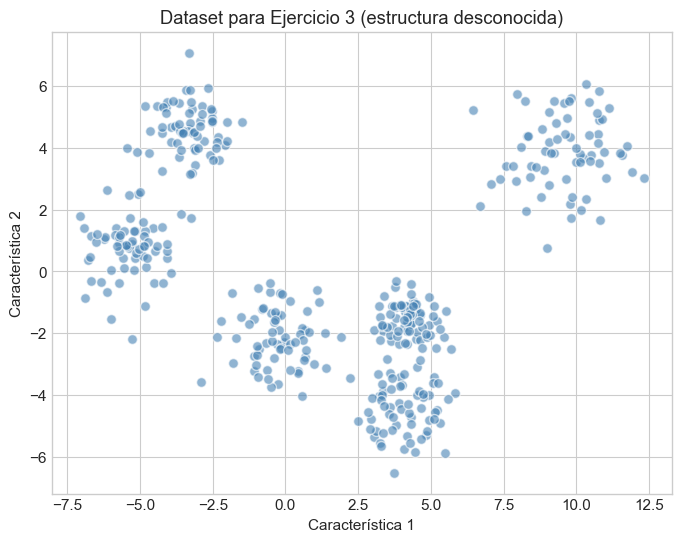

In [9]:
# Dataset para el Ejercicio 3 (estructura oculta)
np.random.seed(123)
X_ej3, y_ej3_oculto = make_blobs(
    n_samples=400,
    n_features=2,
    centers=6,
    cluster_std=[0.8, 1.0, 0.6, 1.2, 0.9, 0.7],
    random_state=123
)

# Visualización (sin etiquetas)
plt.figure(figsize=(8, 6))
plt.scatter(X_ej3[:, 0], X_ej3[:, 1], c='steelblue', alpha=0.6, edgecolors='w', s=50)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Dataset para Ejercicio 3 (estructura desconocida)')
plt.show()

### Tarea 3.1: Método del Codo

Calcule la inercia para k = 2, 3, ..., 10 y genere el gráfico del codo.

c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\CHOPPE\Docume

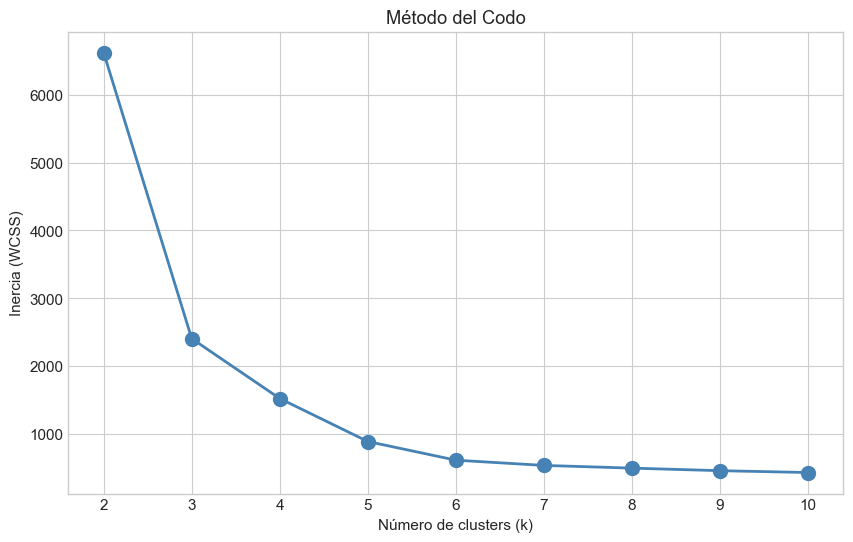

In [10]:
# TODO: Implementar el método del codo
k_range = range(2, 11)
inercias = []

# Su código aquí
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=RANDOM_STATE)
    labels = kmeans.fit_predict(X_ej3)
    inercias.append(kmeans.inertia_)

# Visualización
if len(inercias) > 0:
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inercias, 'o-', linewidth=2, markersize=10, color='steelblue')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Inercia (WCSS)')
    plt.title('Método del Codo')
    plt.xticks(k_range)
    plt.show()

### Tarea 3.2: Método de la Silueta

Calcule el coeficiente de silueta promedio para k = 2, 3, ..., 10.

c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\CHOPPE\Docume

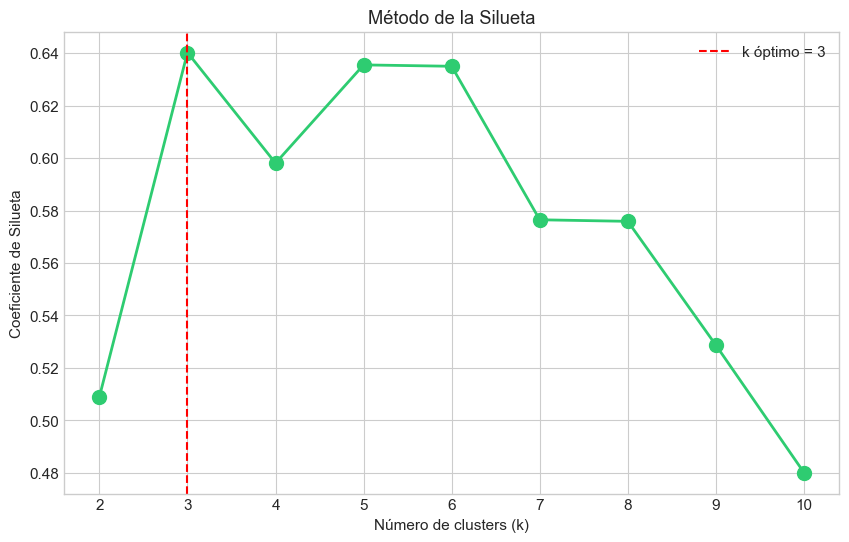

In [11]:
# TODO: Implementar el método de la silueta
siluetas = []

# Su código aquí.
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=RANDOM_STATE)
    labels = kmeans.fit_predict(X_ej3)
    siluetas.append(silhouette_score(X_ej3, labels))

# Visualización
if len(siluetas) > 0:
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, siluetas, 'o-', linewidth=2, markersize=10, color='#2ecc71')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Coeficiente de Silueta')
    plt.title('Método de la Silueta')
    plt.xticks(k_range)

    # Marcar el máximo
    k_optimo = list(k_range)[np.argmax(siluetas)]
    plt.axvline(x=k_optimo, color='red', linestyle='--', label=f'k óptimo = {k_optimo}')
    plt.legend()
    plt.show()

### Tarea 3.3: Diagrama de Siluetas Detallado

Genere diagramas de silueta para k = 4, 5, 6, 7 para analizar la calidad de cada cluster individualmente.

c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\CHOPPE\Docume

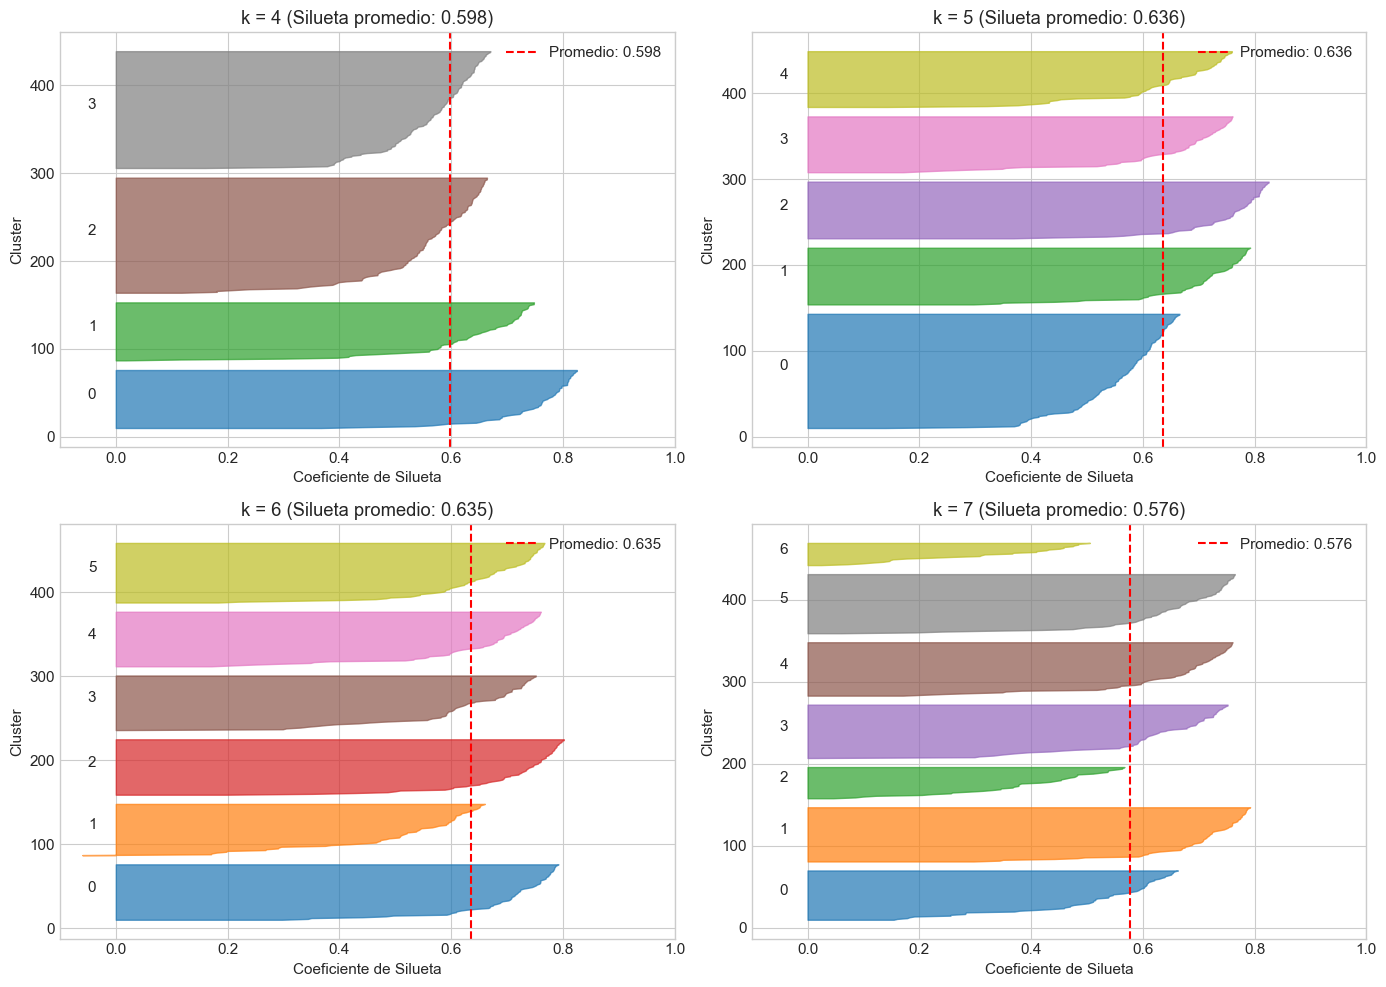

In [12]:
# TODO: Generar diagramas de silueta
# Sugerencia: para cada k, calcular silhouette_samples y visualizar

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, k in enumerate([4, 5, 6, 7]):
    ax = axes[idx]

    # TODO: Ajustar KMeans con k clusters
    # TODO: Calcular siluetas individuales con silhouette_samples
    # TODO: Visualizar el diagrama de siluetas
    # Ajustar KMeans con k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_ej3)

    # Calcular siluetas individuales y promedio
    silhouette_vals = silhouette_samples(X_ej3, cluster_labels)
    silhouette_avg = silhouette_score(X_ej3, cluster_labels)

    # Visualizar el diagrama de siluetas
    y_lower = 10

    for i in range(k):
        # Obtener siluetas del cluster i y ordenarlas
        cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        cluster_silhouette_vals.sort()

        # Calcular posición en el eje y
        cluster_size = cluster_silhouette_vals.shape[0]
        y_upper = y_lower + cluster_size

        # Dibujar la silueta del cluster
        color = plt.cm.tab10(i / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, cluster_silhouette_vals,
                         facecolor=color, edgecolor=color, alpha=0.7)

        # Etiquetar el cluster en el centro
        ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i))

        y_lower = y_upper + 10  # Espacio entre clusters

    # Línea vertical para la silueta promedio
    ax.axvline(x=silhouette_avg, color="red", linestyle="--",
               label=f'Promedio: {silhouette_avg:.3f}')

    ax.set_title(f'k = {k} (Silueta promedio: {silhouette_avg:.3f})')
    ax.set_xlabel('Coeficiente de Silueta')
    ax.set_ylabel('Cluster')
    ax.set_xlim([-0.1, 1])
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Pregunta de Reflexión 3

Basándose en los análisis realizados:

1. ¿Qué valor de k sugiere el método del codo? ¿Es claro el punto de inflexión?
2. ¿Qué valor de k maximiza el coeficiente de silueta?
3. ¿Los diagramas de silueta muestran clusters homogéneos para el k seleccionado?
4. ¿Cuál sería su recomendación final para k y por qué?

*Escriba su respuesta aquí:*

...

---

## Ejercicio 4: Mini-Batch K-Means y Escalabilidad

### Contexto

Para datasets grandes, Mini-Batch K-Means ofrece una alternativa eficiente. En este ejercicio, comparará el rendimiento y la calidad de ambos algoritmos.

### Datos

In [13]:
# Datasets de diferentes tamaños
tamanos = [1000, 5000, 20000, 50000]
datasets = {}

for n in tamanos:
    X_temp, _ = make_blobs(n_samples=n, n_features=2, centers=8,
                           cluster_std=1.0, random_state=RANDOM_STATE)
    datasets[n] = X_temp

print(f"Datasets generados: {list(datasets.keys())} muestras")

Datasets generados: [1000, 5000, 20000, 50000] muestras


### Tarea 4.1: Comparación de Tiempo de Ejecución

Para cada tamaño de dataset, mida el tiempo de ejecución de K-Means estándar y Mini-Batch K-Means.

In [14]:
import time

# TODO: Comparar tiempos de ejecución
resultados = {
    'n_samples': [],
    'tiempo_kmeans': [],
    'tiempo_minibatch': [],
    'inercia_kmeans': [],
    'inercia_minibatch': []
}

k = 8

for n, X in datasets.items():
    # TODO: Medir tiempo y inercia para KMeans
    inicio = time.time()
    km_std = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=RANDOM_STATE)
    km_std.fit(X)
    tiempo_std = time.time() - inicio
    # TODO: Medir tiempo y inercia para MiniBatchKMeans (batch_size=256)
    inicio = time.time()
    km_mb = MiniBatchKMeans(n_clusters=k, init='k-means++', n_init=10,
                            batch_size=256, random_state=RANDOM_STATE)
    km_mb.fit(X)
    tiempo_mb = time.time() - inicio

    resultados['n_samples'].append(n)
    resultados['tiempo_kmeans'].append(tiempo_std)
    resultados['tiempo_minibatch'].append(tiempo_mb)
    resultados['inercia_kmeans'].append(km_std.inertia_)
    resultados['inercia_minibatch'].append(km_mb.inertia_)




c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by sett

In [15]:
# Crear DataFrame con resultados
if len(resultados['n_samples']) > 0:
    df_resultados = pd.DataFrame(resultados)
    df_resultados['speedup'] = df_resultados['tiempo_kmeans'] / df_resultados['tiempo_minibatch']
    df_resultados['diferencia_inercia_%'] = 100 * (df_resultados['inercia_minibatch'] - df_resultados['inercia_kmeans']) / df_resultados['inercia_kmeans']

    print(df_resultados.to_string(index=False))

 n_samples  tiempo_kmeans  tiempo_minibatch  inercia_kmeans  inercia_minibatch  speedup  diferencia_inercia_%
      1000       0.055931          0.084597     1702.768210        1706.845675 0.661148              0.239461
      5000       0.041930          0.105546     8757.541481        9306.799239 0.397270              6.271826
     20000       0.075934          0.251214    34962.349815       34992.380285 0.302268              0.085894
     50000       0.227684          0.056112    87309.423410       87851.103342 4.057663              0.620414


In [16]:
 print(resultados)

{'n_samples': [1000, 5000, 20000, 50000], 'tiempo_kmeans': [0.05593109130859375, 0.041930437088012695, 0.07593393325805664, 0.22768378257751465], 'tiempo_minibatch': [0.08459687232971191, 0.10554647445678711, 0.25121378898620605, 0.056112051010131836], 'inercia_kmeans': [1702.768209741992, 8757.541481420658, 34962.349815408474, 87309.42340959146], 'inercia_minibatch': [1706.845674852317, 9306.799238721922, 34992.380285174135, 87851.10334204101]}


### Tarea 4.2: Visualización de Resultados

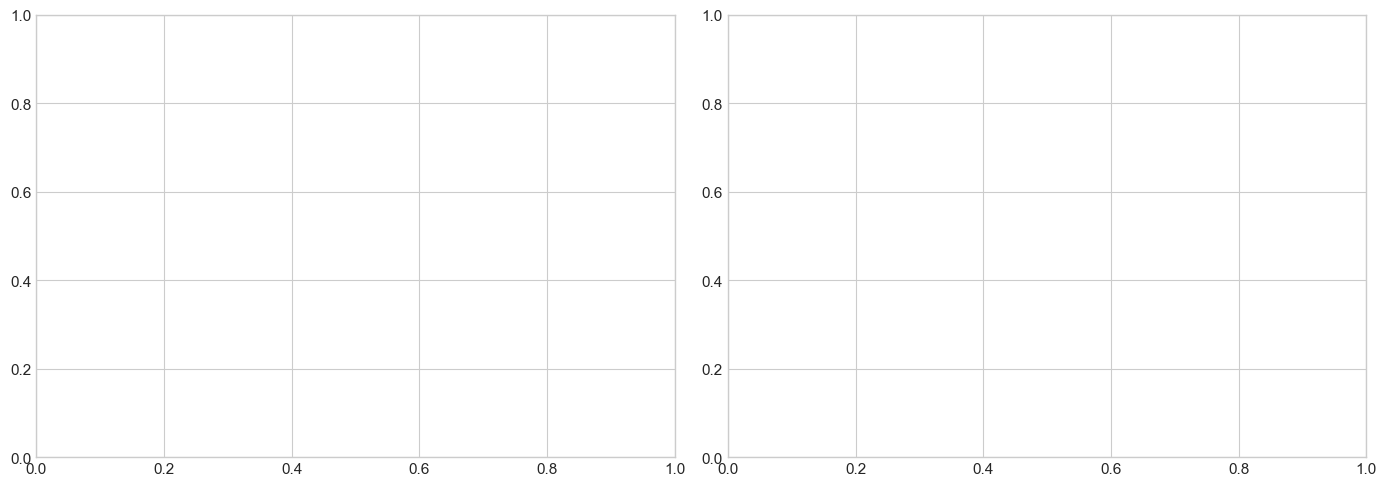

In [17]:
# TODO: Visualizar la comparación
# Gráfico 1: Tiempo de ejecución vs tamaño del dataset
# Gráfico 2: Speedup vs tamaño del dataset

if 'df_resultados' in dir() and len(df_resultados) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Su código aquí para crear los gráficos

    plt.tight_layout()
    plt.show()

### Pregunta de Reflexión 4

Analice los resultados de la comparación:

1. ¿Cómo escala el speedup con el tamaño del dataset?
2. ¿Cuál es el impacto en la calidad del clustering (diferencia de inercia)?
3. ¿En qué situaciones recomendaría usar Mini-Batch K-Means?
4. ¿Cómo afecta el parámetro `batch_size` al trade-off velocidad/calidad?

*Escriba su respuesta aquí:*

...

---

## Ejercicio 5: Limitaciones de K-Means

### Contexto

K-Means tiene limitaciones importantes que es fundamental conocer. En este ejercicio, explorará escenarios donde el algoritmo no funciona correctamente.

### Datos

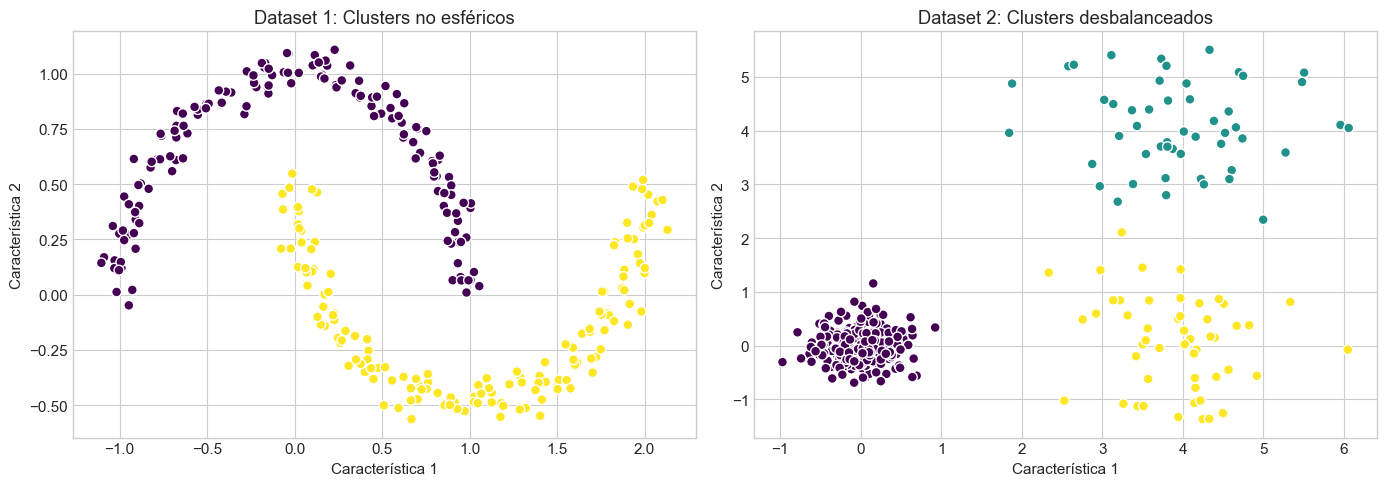

In [18]:
# Dataset 1: Clusters de forma no esférica (lunas)
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=RANDOM_STATE)

# Dataset 2: Clusters de diferente densidad y tamaño
np.random.seed(RANDOM_STATE)
cluster1 = np.random.randn(300, 2) * 0.3 + np.array([0, 0])
cluster2 = np.random.randn(50, 2) * 0.8 + np.array([4, 4])
cluster3 = np.random.randn(50, 2) * 0.8 + np.array([4, 0])
X_desbalanceado = np.vstack([cluster1, cluster2, cluster3])
y_desbalanceado = np.array([0]*300 + [1]*50 + [2]*50)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', edgecolors='w', s=50)
axes[0].set_title('Dataset 1: Clusters no esféricos')
axes[0].set_xlabel('Característica 1')
axes[0].set_ylabel('Característica 2')

axes[1].scatter(X_desbalanceado[:, 0], X_desbalanceado[:, 1], c=y_desbalanceado, cmap='viridis', edgecolors='w', s=50)
axes[1].set_title('Dataset 2: Clusters desbalanceados')
axes[1].set_xlabel('Característica 1')
axes[1].set_ylabel('Característica 2')

plt.tight_layout()
plt.show()

### Tarea 5.1: Aplicar K-Means a Datos No Esféricos

Aplique K-Means con k=2 al dataset de lunas y evalúe el resultado.

c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


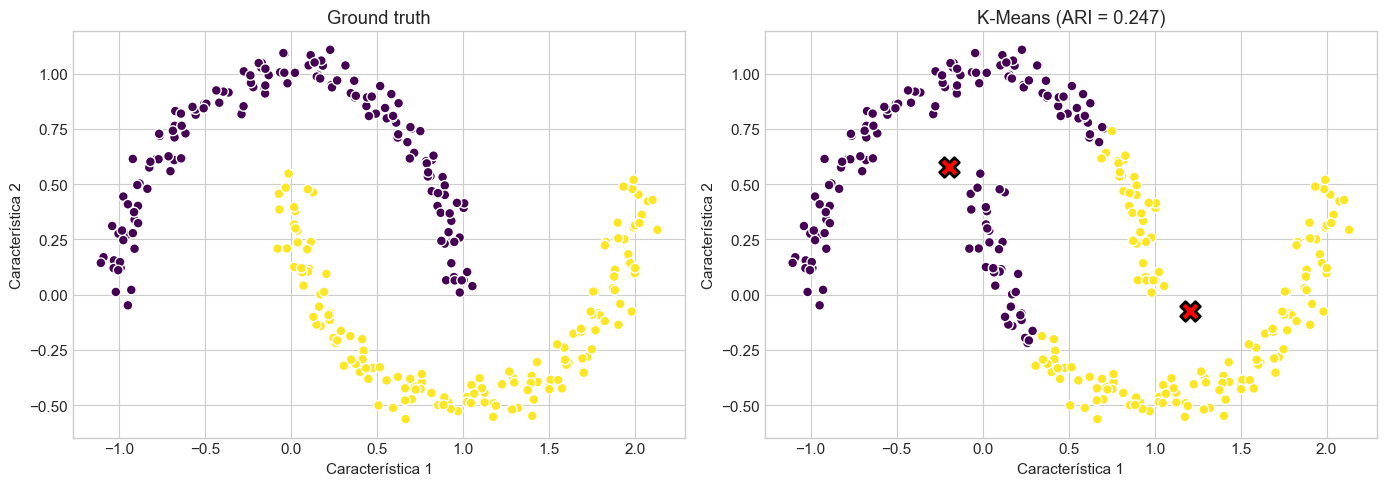

Adjusted Rand Index: 0.247
K-Means falla porque asume clusters esféricos.


In [19]:
# TODO: Aplicar K-Means al dataset de lunas
# 1. Ajustar KMeans con k=2
# 2. Calcular Adjusted Rand Index (ARI) comparando con y_moons
# 3. Visualizar el resultado
kmeans_moons = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=RANDOM_STATE)
labels_moons = kmeans_moons.fit_predict(X_moons)

ari_moons = adjusted_rand_score(y_moons, labels_moons)

# Visualización
# Su código aquí para visualizar el resultado de K-Means vs ground truth
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', edgecolors='w', s=50)
axes[0].set_title('Ground truth')
axes[0].set_xlabel('Característica 1')
axes[0].set_ylabel('Característica 2')

axes[1].scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, cmap='viridis', edgecolors='w', s=50)
axes[1].scatter(kmeans_moons.cluster_centers_[:, 0], kmeans_moons.cluster_centers_[:, 1],
                c='red', marker='X', s=200, edgecolors='black', linewidths=2)
axes[1].set_title(f'K-Means (ARI = {ari_moons:.3f})')
axes[1].set_xlabel('Característica 1')
axes[1].set_ylabel('Característica 2')

plt.tight_layout()
plt.show()

print(f"Adjusted Rand Index: {ari_moons:.3f}")
print("K-Means falla porque asume clusters esféricos.")

### Tarea 5.2: Aplicar K-Means a Datos Desbalanceados

Aplique K-Means con k=3 al dataset desbalanceado y analice cómo maneja los clusters de diferente tamaño.

In [20]:
# TODO: Aplicar K-Means al dataset desbalanceado
# 1. Ajustar KMeans con k=3
# 2. Calcular ARI y NMI
# 3. Contar puntos por cluster predicho vs real

# Su código aquí


# Visualización y análisis
# Su código aquí

### Pregunta de Reflexión 5

Analice las limitaciones observadas:

1. ¿Por qué K-Means falla con los clusters en forma de luna?
2. ¿Qué sucede con el cluster grande en el dataset desbalanceado?
3. Para cada caso, ¿qué algoritmo alternativo recomendaría y por qué?

*Escriba su respuesta aquí:*

...

---

## Ejercicio 6: Caso Práctico Integrador

### Contexto

Una empresa de retail desea segmentar a sus clientes para personalizar sus estrategias de marketing. Dispone de datos de transacciones que incluyen información sobre el comportamiento de compra de cada cliente.

### Datos

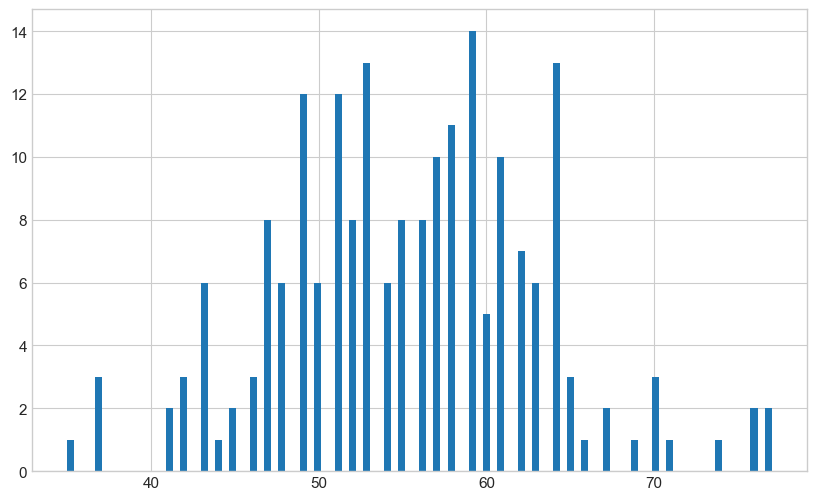

In [21]:
data = np.random.poisson(50 , 200) + 5

plt.hist(data, bins=100)
plt.show()

In [22]:
# Simulación de datos de clientes
np.random.seed(RANDOM_STATE)
n_clientes = 800

# Generar características de clientes
data = {
    'CustomerID': range(1, n_clientes + 1),
    'Recency': np.concatenate([
        np.random.exponential(15, 200),      # Clientes muy activos
        np.random.exponential(45, 250),      # Clientes regulares
        np.random.exponential(90, 200),      # Clientes ocasionales
        np.random.exponential(180, 150)      # Clientes inactivos
    ]),
    'Frequency': np.concatenate([
        np.random.poisson(20, 200) + 5,
        np.random.poisson(8, 250) + 2,
        np.random.poisson(3, 200) + 1,
        np.random.poisson(1, 150) + 1
    ]),
    'Monetary': np.concatenate([
        np.random.lognormal(6, 0.5, 200),
        np.random.lognormal(5, 0.4, 250),
        np.random.lognormal(4.5, 0.6, 200),
        np.random.lognormal(4, 0.5, 150)
    ]),
    'AvgBasketSize': np.concatenate([
        np.random.normal(8, 2, 200),
        np.random.normal(5, 1.5, 250),
        np.random.normal(3, 1, 200),
        np.random.normal(2, 0.8, 150)
    ])
}

df_clientes = pd.DataFrame(data)
df_clientes['Recency'] = df_clientes['Recency'].clip(lower=1)
df_clientes['AvgBasketSize'] = df_clientes['AvgBasketSize'].clip(lower=1)

print("Primeras filas del dataset:")
print(df_clientes.head(10))
print(f"\nDimensiones: {df_clientes.shape}")
print(f"\nEstadísticas descriptivas:")
print(df_clientes.describe())

Primeras filas del dataset:
   CustomerID    Recency  Frequency    Monetary  AvgBasketSize
0           1   7.039021         28  245.923646       9.103772
1           2  45.151821         26  396.428697       9.360460
2           3  19.751185         24  268.943029       4.126495
3           4  13.694138         33  231.129180       6.477289
4           5   2.544373         24  459.128705       6.243473
5           6   2.543944         31  448.706899       8.199774
6           7   1.000000         26  596.713362       8.961489
7           8  30.168463         15  325.198972      10.993421
8           9  13.786232         29  494.737057       7.010069
9          10  18.468751         23  531.338230       7.004855

Dimensiones: (800, 5)

Estadísticas descriptivas:
       CustomerID     Recency   Frequency     Monetary  AvgBasketSize
count    800.0000  800.000000  800.000000   800.000000     800.000000
mean     400.5000   74.098472   10.700000   194.440113       4.702472
std      231.0844 

### Tarea 6.1: Análisis Exploratorio

Realice un análisis exploratorio de las variables disponibles.

In [23]:
import seaborn as sns

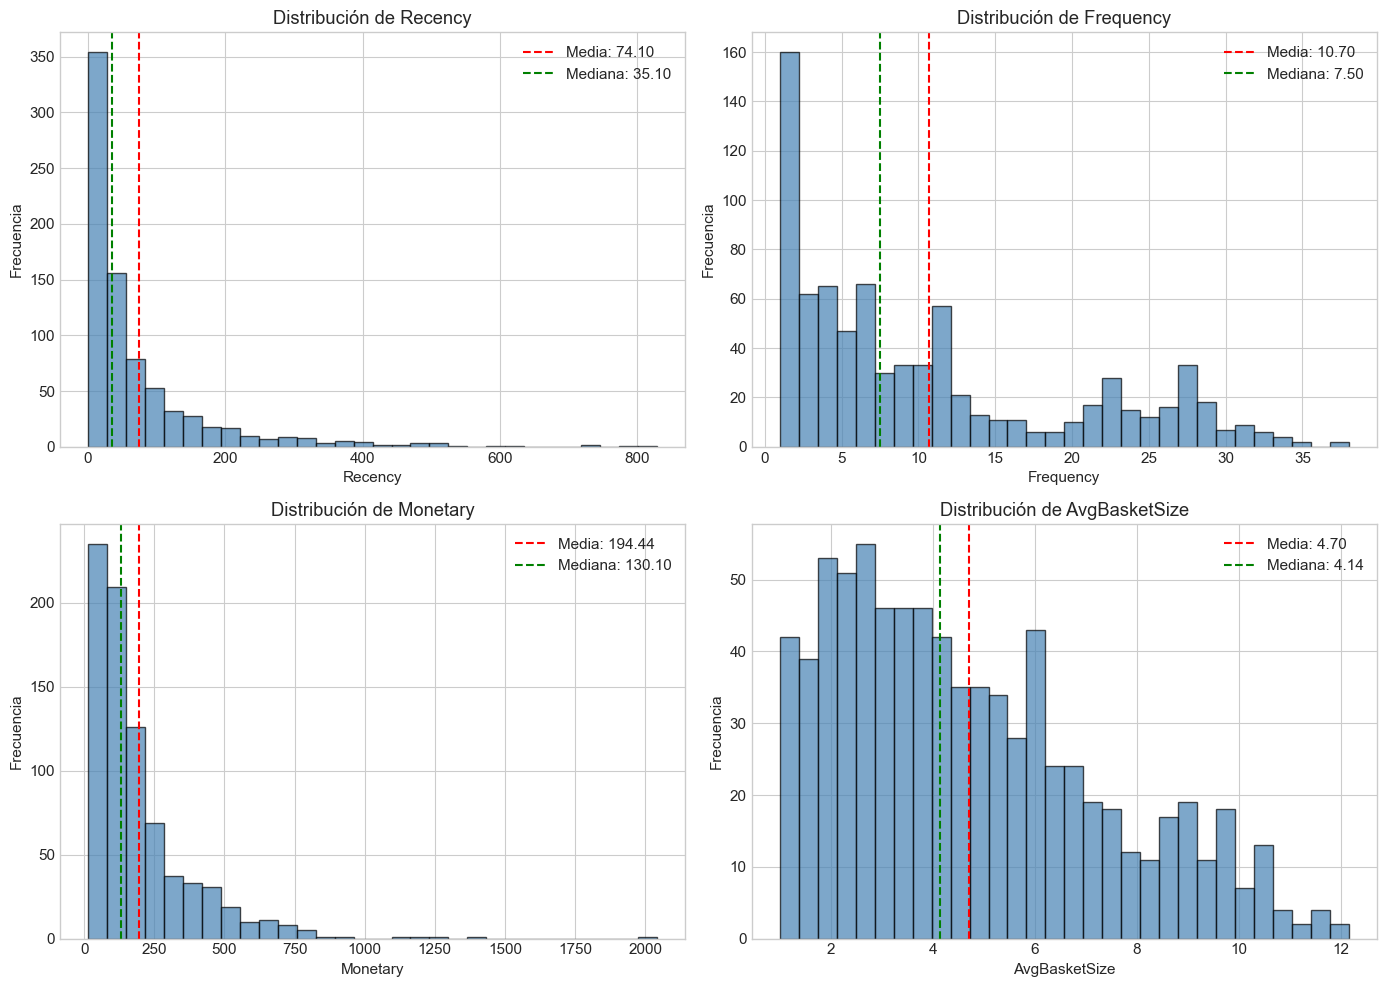


MATRIZ DE CORRELACIONES
               Recency  Frequency  Monetary  AvgBasketSize
Recency          1.000     -0.403    -0.309         -0.408
Frequency       -0.403      1.000     0.703          0.782
Monetary        -0.309      0.703     1.000          0.609
AvgBasketSize   -0.408      0.782     0.609          1.000


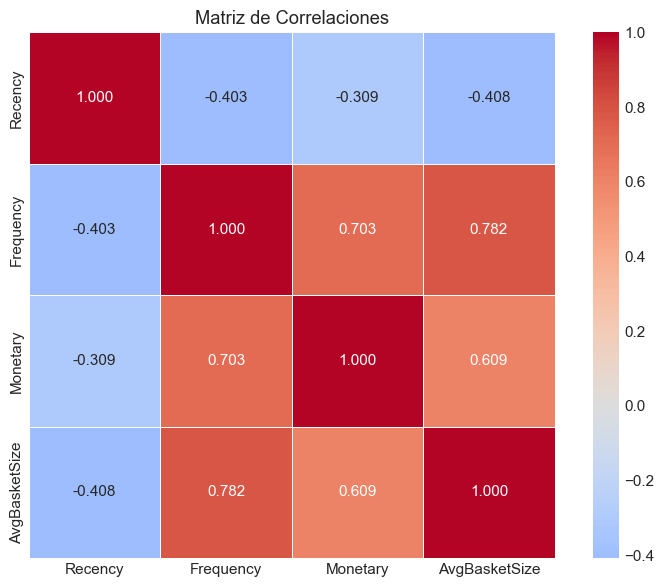

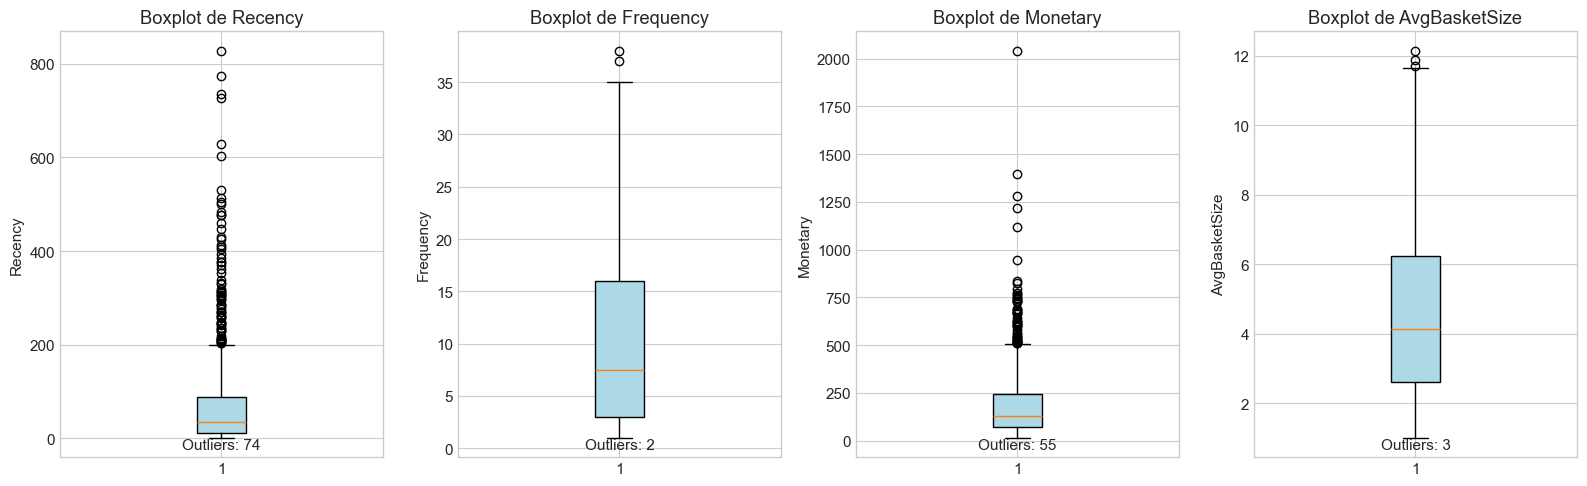


RELACIONES ENTRE VARIABLES


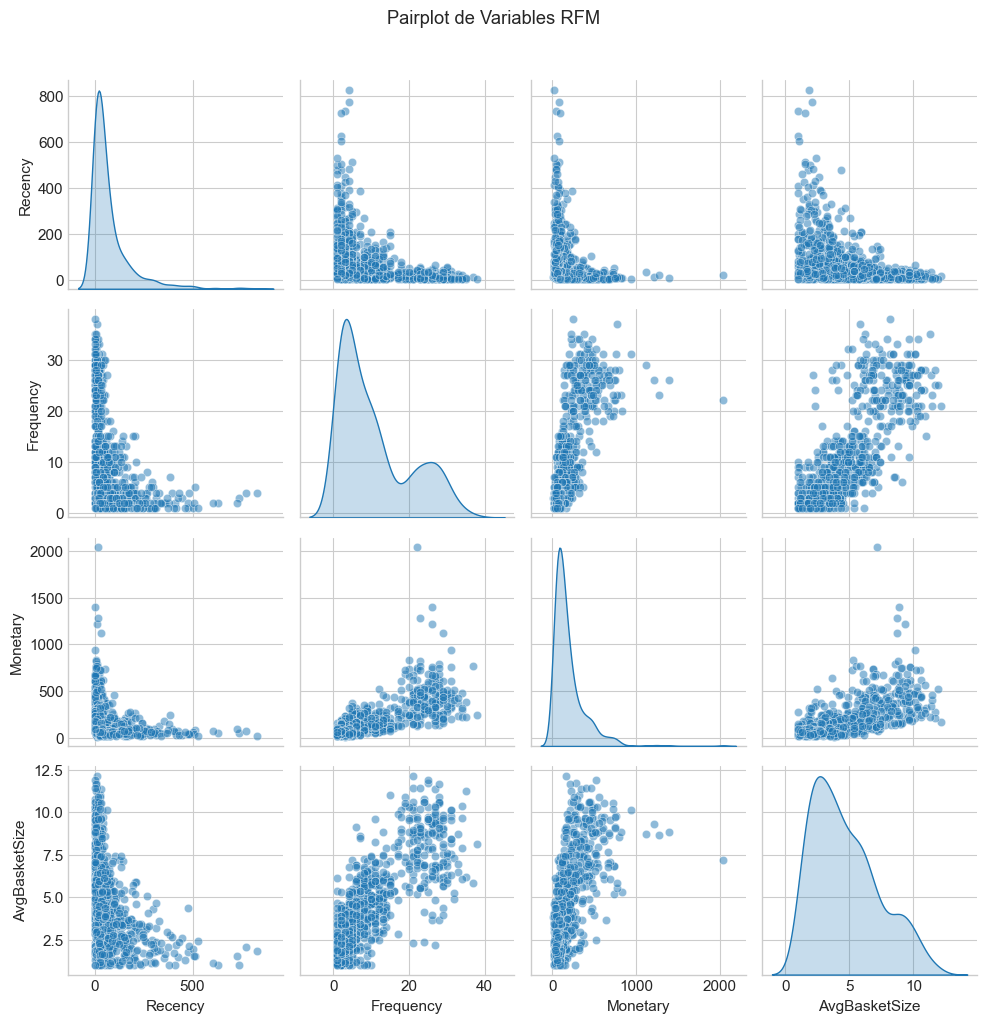


Observaciones del análisis exploratorio:
- Recency: Distribución sesgada a la derecha (muchos clientes recientes, pocos inactivos)
- Frequency: Distribución sesgada a la derecha (la mayoría compra pocas veces)
- Monetary: Distribución log-normal típica de gastos
- AvgBasketSize: Distribución más simétrica
- Correlaciones positivas entre Frequency, Monetary y AvgBasketSize
- Correlación negativa entre Recency y las demás variables


In [24]:
# SOLUCIÓN: Análisis exploratorio
# 1. Visualizar distribuciones de cada variable
# 2. Analizar correlaciones
# 3. Identificar posibles outliers

features = ['Recency', 'Frequency', 'Monetary', 'AvgBasketSize']

# 1. Distribuciones de cada variable
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(features):
    ax = axes[idx]
    ax.hist(df_clientes[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    ax.axvline(df_clientes[col].mean(), color='red', linestyle='--', label=f'Media: {df_clientes[col].mean():.2f}')
    ax.axvline(df_clientes[col].median(), color='green', linestyle='--', label=f'Mediana: {df_clientes[col].median():.2f}')
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    ax.legend()

plt.tight_layout()
plt.show()

# 2. Matriz de correlaciones
print("\n" + "="*50)
print("MATRIZ DE CORRELACIONES")
print("="*50)

correlation_matrix = df_clientes[features].corr()
print(correlation_matrix.round(3))

# Visualización de correlaciones con heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.3f', square=True, linewidths=0.5)
plt.title('Matriz de Correlaciones')
plt.tight_layout()
plt.show()

# 3. Identificación de outliers con boxplots
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

for idx, col in enumerate(features):
    ax = axes[idx]
    bp = ax.boxplot(df_clientes[col], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    ax.set_title(f'Boxplot de {col}')
    ax.set_ylabel(col)

    # Calcular y mostrar número de outliers
    Q1 = df_clientes[col].quantile(0.25)
    Q3 = df_clientes[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_clientes[(df_clientes[col] < Q1 - 1.5*IQR) | (df_clientes[col] > Q3 + 1.5*IQR)][col]
    ax.text(0.5, 0.02, f'Outliers: {len(outliers)}', transform=ax.transAxes, ha='center')

plt.tight_layout()
plt.show()

# 4. Scatter plot matrix (pairplot)
print("\n" + "="*50)
print("RELACIONES ENTRE VARIABLES")
print("="*50)

sns.pairplot(df_clientes[features], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot de Variables RFM', y=1.02)
plt.tight_layout()
plt.show()

print("\nObservaciones del análisis exploratorio:")
print("- Recency: Distribución sesgada a la derecha (muchos clientes recientes, pocos inactivos)")
print("- Frequency: Distribución sesgada a la derecha (la mayoría compra pocas veces)")
print("- Monetary: Distribución log-normal típica de gastos")
print("- AvgBasketSize: Distribución más simétrica")
print("- Correlaciones positivas entre Frequency, Monetary y AvgBasketSize")
print("- Correlación negativa entre Recency y las demás variables")

### Tarea 6.2: Preprocesamiento

Prepare los datos para el clustering: seleccione las características relevantes y aplique estandarización.

In [25]:
# TODO: Preprocesamiento
# 1. Seleccionar características (excluir CustomerID)
# 2. Aplicar StandardScaler
features = ['Recency', 'Frequency', 'Monetary', 'AvgBasketSize']

# 1. Seleccionar las características para clustering
X = df_clientes[features].copy()

print("Datos antes de estandarizar:")
print(X.describe().round(2))

# 2. Aplicar estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Datos antes de estandarizar:
       Recency  Frequency  Monetary  AvgBasketSize
count   800.00     800.00    800.00         800.00
mean     74.10      10.70    194.44           4.70
std     107.37       9.31    192.56           2.60
min       1.00       1.00     14.81           1.00
25%      11.50       3.00     71.87           2.61
50%      35.10       7.50    130.10           4.14
75%      87.12      16.00    244.80           6.24
max     828.22      38.00   2041.72          12.15


In [26]:
# Convertir a DataFrame para mejor visualización
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print("\nDatos después de estandarizar:")
print(X_scaled_df.describe().round(2))




Datos después de estandarizar:
       Recency  Frequency  Monetary  AvgBasketSize
count   800.00     800.00    800.00         800.00
mean      0.00       0.00     -0.00           0.00
std       1.00       1.00      1.00           1.00
min      -0.68      -1.04     -0.93          -1.43
25%      -0.58      -0.83     -0.64          -0.81
50%      -0.36      -0.34     -0.33          -0.22
75%       0.12       0.57      0.26           0.59
max       7.03       2.93      9.60           2.87


In [27]:
# Verificar que la media es ~0 y std ~1
print("\nVerificación de estandarización:")
print(f"Medias: {X_scaled.mean(axis=0).round(6)}")
print(f"Desviaciones estándar: {X_scaled.std(axis=0).round(6)}")


Verificación de estandarización:
Medias: [ 0.  0. -0.  0.]
Desviaciones estándar: [1. 1. 1. 1.]


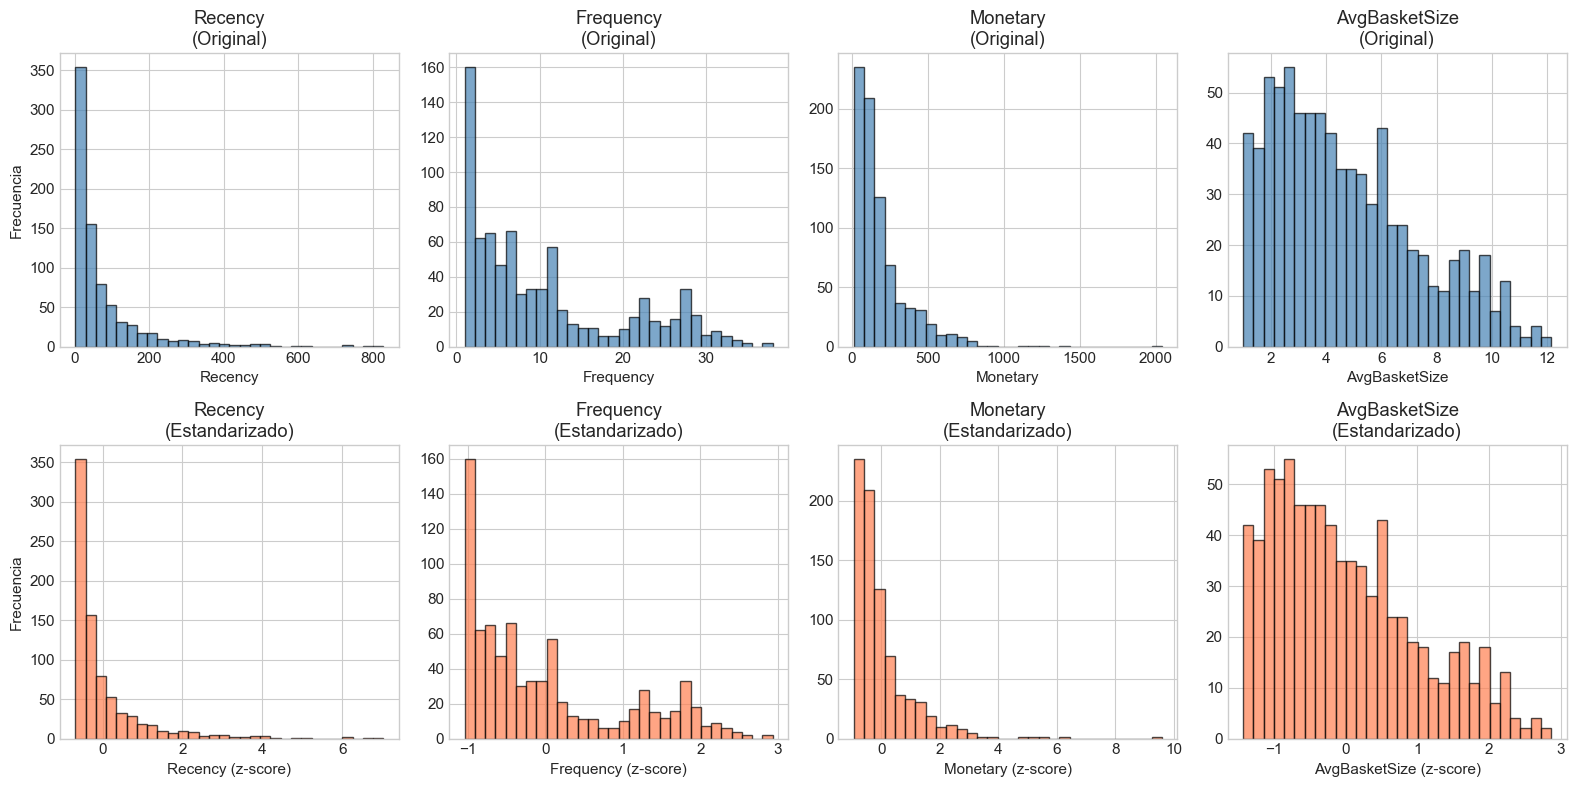


✓ Preprocesamiento completado. Datos listos para clustering.


In [28]:
# Visualizar distribuciones antes y después
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for idx, col in enumerate(features):
    # Antes de estandarizar
    axes[0, idx].hist(X[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[0, idx].set_title(f'{col}\n(Original)')
    axes[0, idx].set_xlabel(col)

    # Después de estandarizar
    axes[1, idx].hist(X_scaled[:, idx], bins=30, edgecolor='black', alpha=0.7, color='coral')
    axes[1, idx].set_title(f'{col}\n(Estandarizado)')
    axes[1, idx].set_xlabel(f'{col} (z-score)')

axes[0, 0].set_ylabel('Frecuencia')
axes[1, 0].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

print("\n✓ Preprocesamiento completado. Datos listos para clustering.")

### Tarea 6.3: Determinación del Número de Segmentos

Utilice los métodos del codo y silueta para determinar el número óptimo de segmentos.

Calculando métricas para diferentes valores de k...

k=2: Inercia=1624.13, Silueta=0.5176
k=3: Inercia=1119.72, Silueta=0.4900
k=4: Inercia=893.22, Silueta=0.3583


c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\CHOPPE\Docume

k=5: Inercia=736.26, Silueta=0.3520
k=6: Inercia=632.92, Silueta=0.3463
k=7: Inercia=563.17, Silueta=0.3317
k=8: Inercia=505.82, Silueta=0.3368


c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\CHOPPE\Documents\CEROSA 2024\anaconda\envs\kmeans_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


k=9: Inercia=465.53, Silueta=0.3279
k=10: Inercia=429.21, Silueta=0.2708


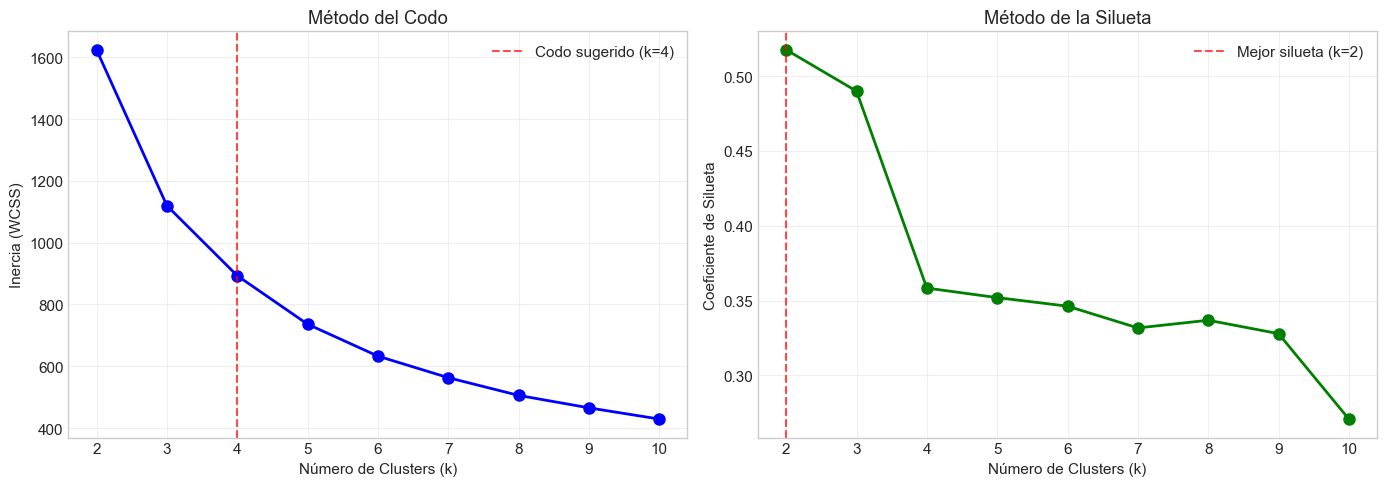

In [29]:
# TODO: Determinar número óptimo de clusters
# 1. Aplicar método del codo
# 2. Aplicar método de la silueta
# 3. Decidir el número de segmentos
k_range = range(2, 11)
inertias = []
silhouette_scores = []

print("Calculando métricas para diferentes valores de k...\n")

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    kmeans.fit(X_scaled)

    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(sil_score)

    print(f"k={k}: Inercia={kmeans.inertia_:.2f}, Silueta={sil_score:.4f}")

# Visualización de ambos métodos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Método del Codo
axes[0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Número de Clusters (k)')
axes[0].set_ylabel('Inercia (WCSS)')
axes[0].set_title('Método del Codo')
axes[0].set_xticks(list(k_range))
axes[0].grid(True, alpha=0.3)

# Marcar el codo (k=4)
axes[0].axvline(x=4, color='red', linestyle='--', alpha=0.7, label='Codo sugerido (k=4)')
axes[0].legend()

# 2. Método de la Silueta
axes[1].plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Número de Clusters (k)')
axes[1].set_ylabel('Coeficiente de Silueta')
axes[1].set_title('Método de la Silueta')
axes[1].set_xticks(list(k_range))
axes[1].grid(True, alpha=0.3)

# Marcar el máximo
best_k = k_range[np.argmax(silhouette_scores)]
axes[1].axvline(x=best_k, color='red', linestyle='--', alpha=0.7,
                label=f'Mejor silueta (k={best_k})')
axes[1].legend()

plt.tight_layout()
plt.show()


DIAGRAMAS DE SILUETA DETALLADOS


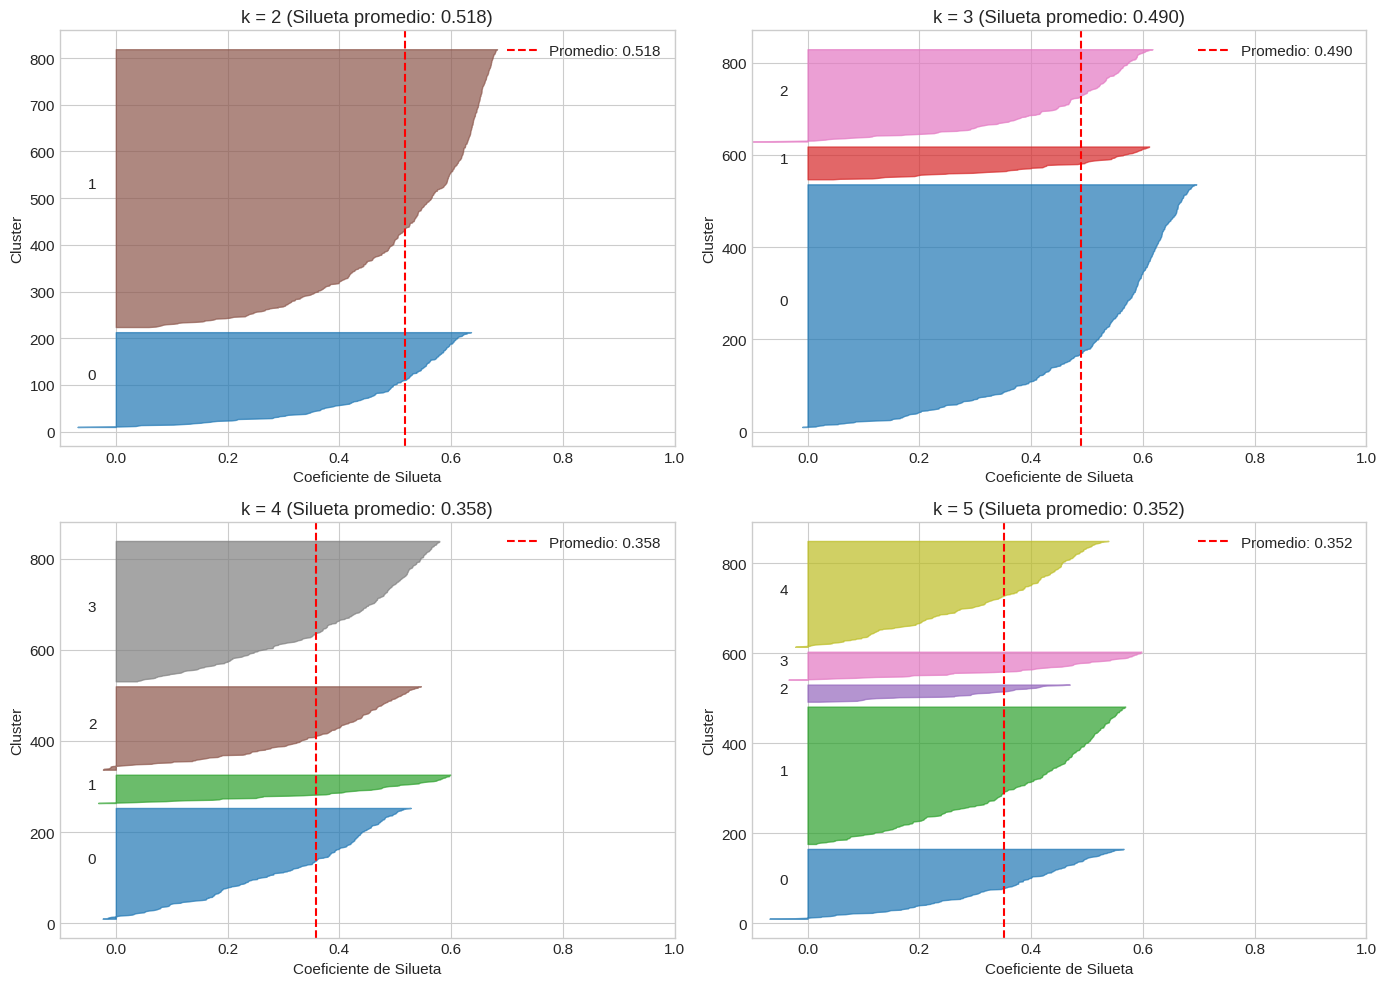

In [ ]:
# Análisis de diagramas de silueta para k = 3, 4, 5, 6
print("\n" + "="*50)
print("DIAGRAMAS DE SILUETA DETALLADOS")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, k in enumerate([2, 3, 4, 5]):
    ax = axes[idx]

    # Ajustar KMeans
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Calcular siluetas
    silhouette_vals = silhouette_samples(X_scaled, cluster_labels)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)

    # Visualizar diagrama de siluetas
    y_lower = 10

    for i in range(k):
        cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        cluster_silhouette_vals.sort()

        cluster_size = cluster_silhouette_vals.shape[0]
        y_upper = y_lower + cluster_size

        color = plt.cm.tab10(i / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, cluster_silhouette_vals,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
        y_lower = y_upper + 10

    ax.axvline(x=silhouette_avg, color="red", linestyle="--",
               label=f'Promedio: {silhouette_avg:.3f}')

    ax.set_title(f'k = {k} (Silueta promedio: {silhouette_avg:.3f})')
    ax.set_xlabel('Coeficiente de Silueta')
    ax.set_ylabel('Cluster')
    ax.set_xlim([-0.1, 1])
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()



**DECISIÓN SOBRE NÚMERO DE CLUSTER:**

+ Método del codo: sugiere k=4 (punto de inflexión)
+ Método de la silueta: mejor puntuación en k=2 (0.5176)

Se selecciona k=4 por:
  - Coincide con el punto de inflexión del codo
  - Tiene una silueta competitiva
  - 4 segmentos son interpretables desde el punto de vista de negocio

### Tarea 6.4: Segmentación y Perfilado

Aplique K-Means con el número de clusters seleccionado y genere perfiles descriptivos de cada segmento.

In [ ]:
# TODO: Segmentación final
# 1. Ajustar KMeans con k óptimo
# 2. Asignar segmentos a los clientes
# 3. Calcular estadísticas por segmento

K_OPTIMO = 4
# 1. Ajustar modelo final
kmeans_final = KMeans(n_clusters=K_OPTIMO, random_state=RANDOM_STATE, n_init=10)
df_clientes['Segmento'] = kmeans_final.fit_predict(X_scaled)

print("="*60)
print("RESULTADOS DE LA SEGMENTACIÓN")
print("="*60)

# 2. Distribución de clientes por segmento
print("\nDistribución de clientes por segmento:")
print(df_clientes['Segmento'].value_counts().sort_index())
print(f"\nPorcentajes:")
print((df_clientes['Segmento'].value_counts(normalize=True).sort_index() * 100).round(1))

# 3. Estadísticas descriptivas por segmento
print("\n" + "="*60)
print("PERFIL DE CADA SEGMENTO (Valores promedio)")
print("="*60)

perfil_segmentos = df_clientes.groupby('Segmento')[features].agg(['mean', 'median', 'std'])

# Tabla resumida con medias
resumen_segmentos = df_clientes.groupby('Segmento')[features].mean().round(2)
resumen_segmentos['N_Clientes'] = df_clientes.groupby('Segmento').size()
resumen_segmentos['%_Clientes'] = (resumen_segmentos['N_Clientes'] / len(df_clientes) * 100).round(1)

print("\n")
print(resumen_segmentos.to_string())

# Centroides en escala original
print("\n" + "="*60)
print("CENTROIDES (escala estandarizada)")
print("="*60)
centroides_scaled = pd.DataFrame(kmeans_final.cluster_centers_, columns=features)
print(centroides_scaled.round(3))

# Transformar centroides a escala original
print("\n" + "="*60)
print("CENTROIDES (escala original)")
print("="*60)
centroides_original = pd.DataFrame(
    scaler.inverse_transform(kmeans_final.cluster_centers_),
    columns=features
)
print(centroides_original.round(2))

# Métricas de calidad del clustering
print("\n" + "="*60)
print("MÉTRICAS DE CALIDAD")
print("="*60)
print(f"Inercia (WCSS): {kmeans_final.inertia_:.2f}")
print(f"Coeficiente de Silueta: {silhouette_score(X_scaled, df_clientes['Segmento']):.4f}")

RESULTADOS DE LA SEGMENTACIÓN

Distribución de clientes por segmento:
Segmento
0    244
1     63
2    184
3    309
Name: count, dtype: int64

Porcentajes:
Segmento
0    30.5
1     7.9
2    23.0
3    38.6
Name: proportion, dtype: float64

PERFIL DE CADA SEGMENTO (Valores promedio)


          Recency  Frequency  Monetary  AvgBasketSize  N_Clientes  %_Clientes
Segmento                                                                     
0           43.80      10.60    164.12           5.30         244        30.5
1          371.70       2.67     71.48           2.27          63         7.9
2           14.09      25.42    451.54           8.24         184        23.0
3           73.08       3.65     90.35           2.62         309        38.6

CENTROIDES (escala estandarizada)
   Recency  Frequency  Monetary  AvgBasketSize
0   -0.282     -0.010    -0.158          0.229
1    2.773     -0.863    -0.639         -0.937
2   -0.559      1.582     1.336          1.365
3   -0.010     -0.758    -

### Tarea 6.5: Visualización de Segmentos

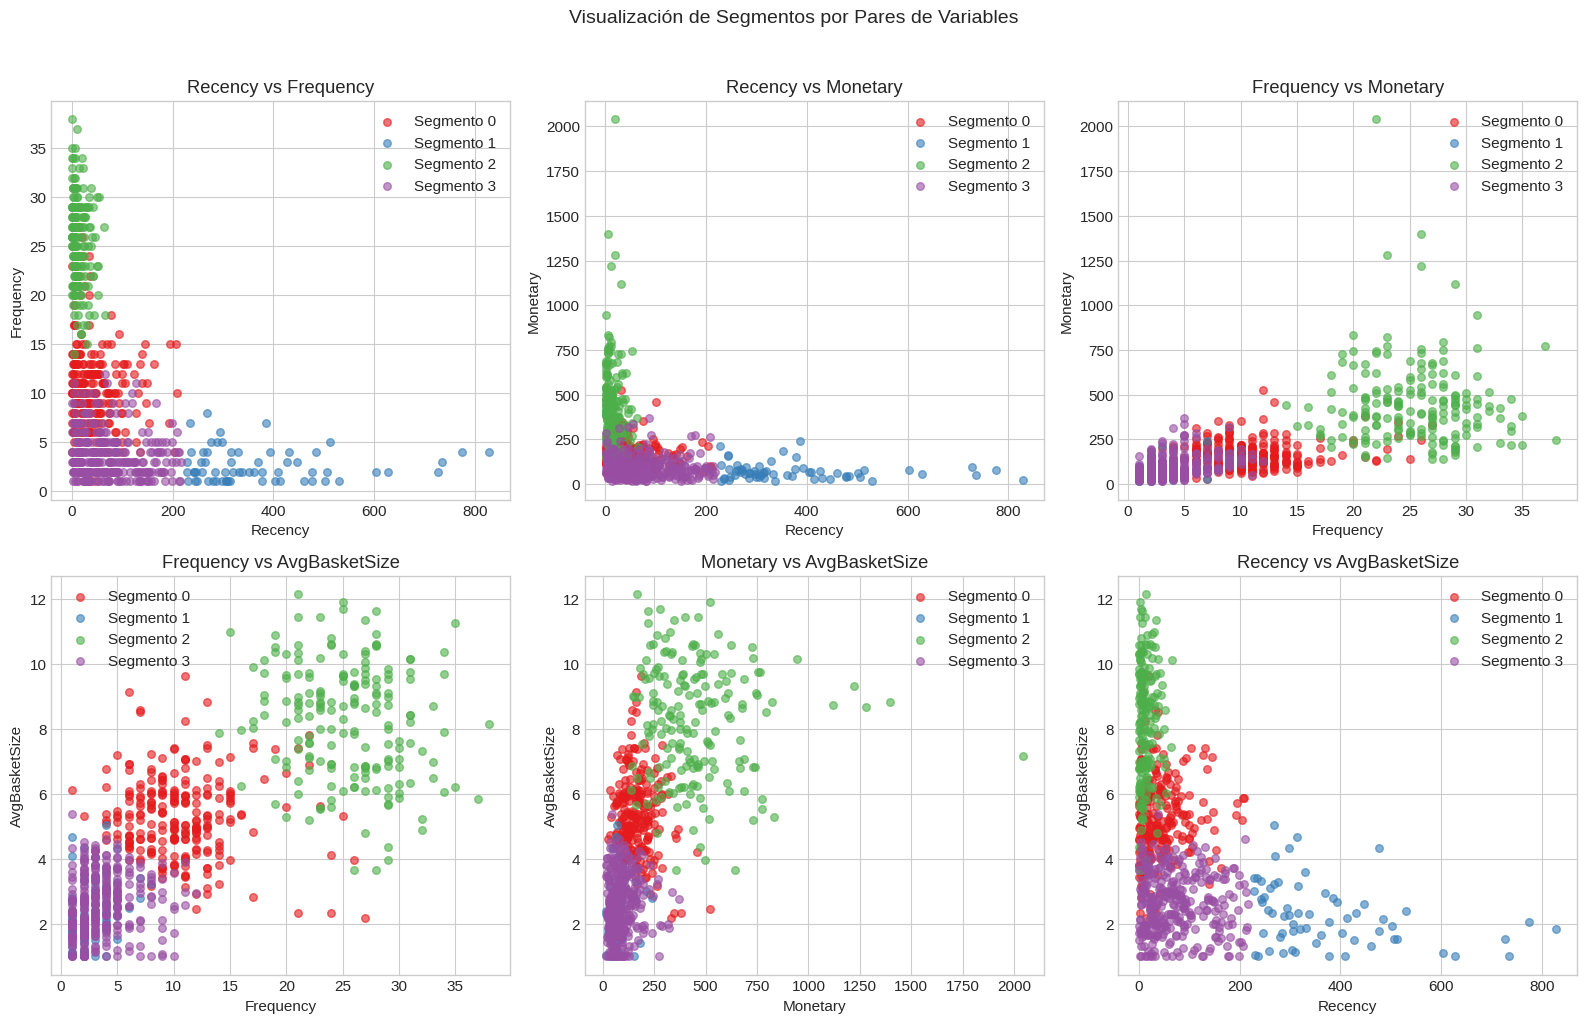

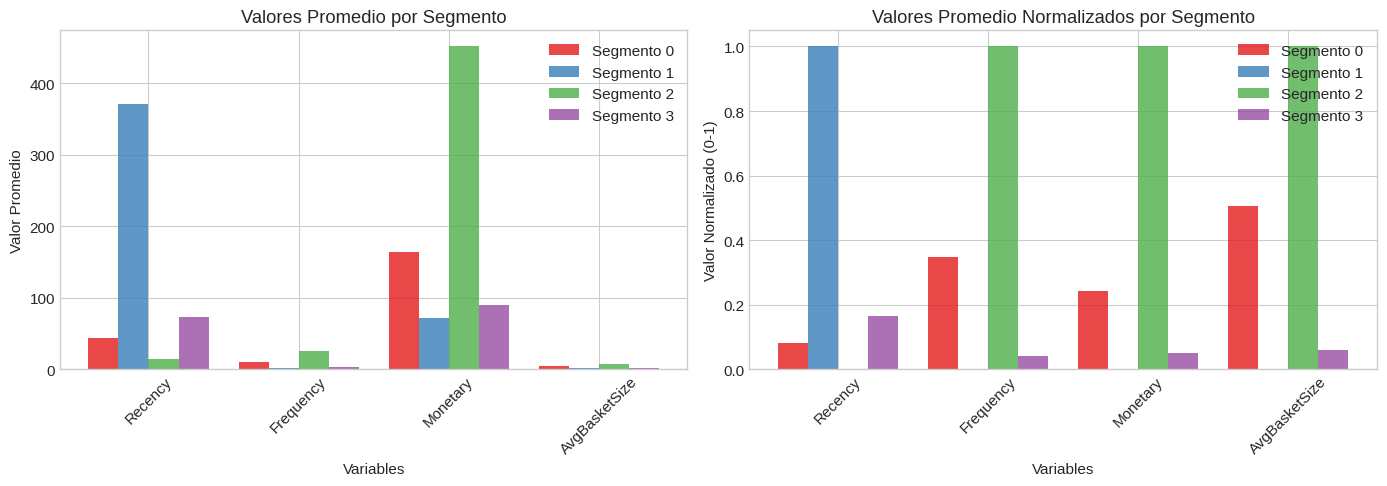

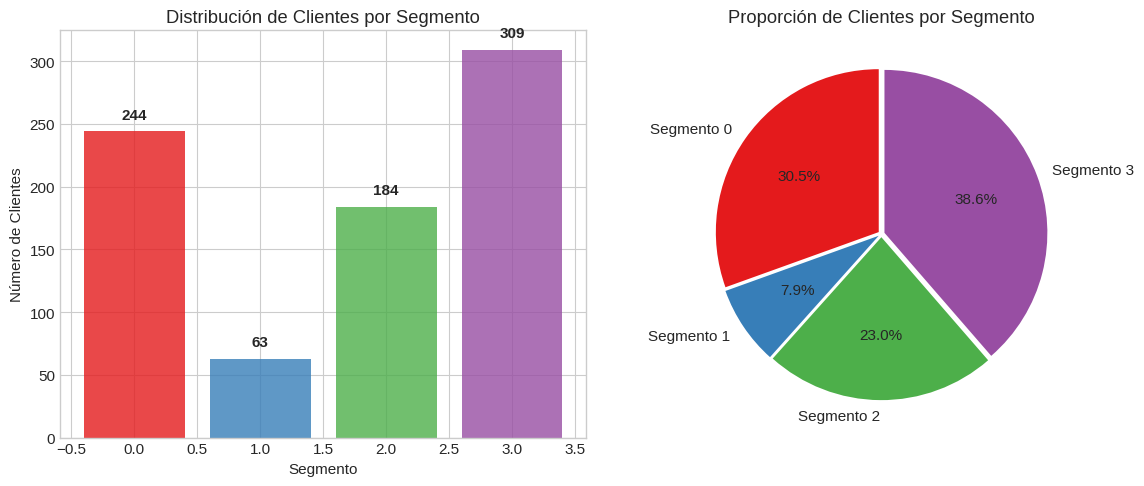

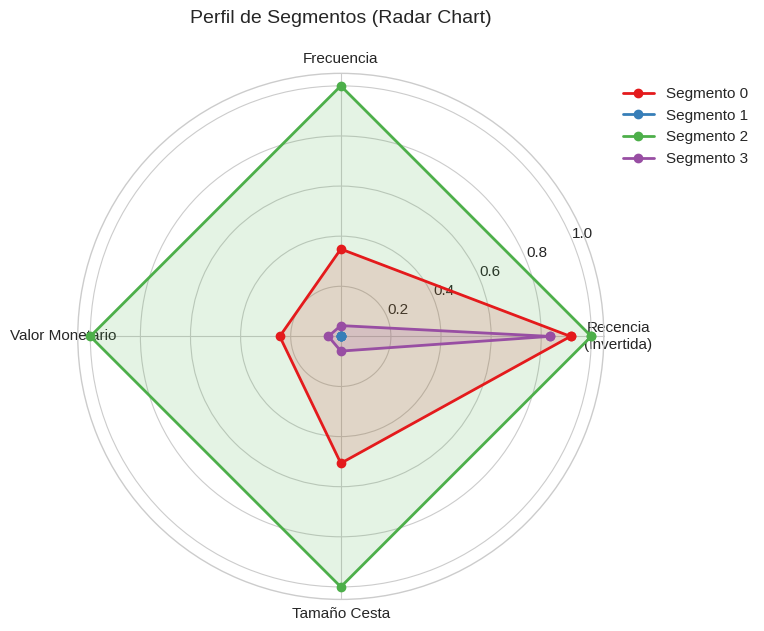

In [ ]:
# TODO: Visualizar los segmentos
# 1. Scatter plots de pares de variables coloreados por segmento
# 2. Gráfico de barras con valores medios por segmento
# 3. Distribución de clientes por segmento

# Definir colores para los segmentos
colores = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']

# 1. Scatter plots de pares de variables principales
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

pares = [
    ('Recency', 'Frequency'),
    ('Recency', 'Monetary'),
    ('Frequency', 'Monetary'),
    ('Frequency', 'AvgBasketSize'),
    ('Monetary', 'AvgBasketSize'),
    ('Recency', 'AvgBasketSize')
]

for idx, (x_var, y_var) in enumerate(pares):
    ax = axes.flatten()[idx]

    for seg in range(K_OPTIMO):
        mask = df_clientes['Segmento'] == seg
        ax.scatter(df_clientes.loc[mask, x_var],
                   df_clientes.loc[mask, y_var],
                   c=colores[seg], label=f'Segmento {seg}', alpha=0.6, s=30)

    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)
    ax.set_title(f'{x_var} vs {y_var}')
    ax.legend()

plt.suptitle('Visualización de Segmentos por Pares de Variables', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# 2. Gráfico de barras con valores medios por segmento (normalizado)
print("\n")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 2a. Valores medios absolutos
medias_segmento = df_clientes.groupby('Segmento')[features].mean()
x = np.arange(len(features))
width = 0.2

for i, seg in enumerate(range(K_OPTIMO)):
    axes[0].bar(x + i*width, medias_segmento.loc[seg], width,
                label=f'Segmento {seg}', color=colores[i], alpha=0.8)

axes[0].set_xlabel('Variables')
axes[0].set_ylabel('Valor Promedio')
axes[0].set_title('Valores Promedio por Segmento')
axes[0].set_xticks(x + width * 1.5)
axes[0].set_xticklabels(features, rotation=45)
axes[0].legend()

# 2b. Valores medios normalizados (para comparar escalas)
medias_norm = df_clientes.groupby('Segmento')[features].mean()
medias_norm = (medias_norm - medias_norm.min()) / (medias_norm.max() - medias_norm.min())

for i, seg in enumerate(range(K_OPTIMO)):
    axes[1].bar(x + i*width, medias_norm.loc[seg], width,
                label=f'Segmento {seg}', color=colores[i], alpha=0.8)

axes[1].set_xlabel('Variables')
axes[1].set_ylabel('Valor Normalizado (0-1)')
axes[1].set_title('Valores Promedio Normalizados por Segmento')
axes[1].set_xticks(x + width * 1.5)
axes[1].set_xticklabels(features, rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()

# 3. Distribución de clientes por segmento
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras
conteo_segmentos = df_clientes['Segmento'].value_counts().sort_index()
axes[0].bar(conteo_segmentos.index, conteo_segmentos.values, color=colores, alpha=0.8)
axes[0].set_xlabel('Segmento')
axes[0].set_ylabel('Número de Clientes')
axes[0].set_title('Distribución de Clientes por Segmento')

for i, v in enumerate(conteo_segmentos.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Gráfico de pastel
axes[1].pie(conteo_segmentos.values, labels=[f'Segmento {i}' for i in conteo_segmentos.index],
            autopct='%1.1f%%', colors=colores, startangle=90, explode=[0.02]*K_OPTIMO)
axes[1].set_title('Proporción de Clientes por Segmento')

plt.tight_layout()
plt.show()

# 4. Radar chart / Gráfico de araña por segmento
from math import pi

# Normalizar datos para el radar
medias_radar = df_clientes.groupby('Segmento')[features].mean()
# Para Recency, invertir la escala (menor es mejor)
medias_radar_norm = medias_radar.copy()
for col in features:
    if col == 'Recency':
        # Invertir: valores bajos de recency -> valores altos en el radar
        medias_radar_norm[col] = (medias_radar[col].max() - medias_radar[col]) / (medias_radar[col].max() - medias_radar[col].min())
    else:
        medias_radar_norm[col] = (medias_radar[col] - medias_radar[col].min()) / (medias_radar[col].max() - medias_radar[col].min())

# Configurar radar
categories = ['Recencia\n(invertida)', 'Frecuencia', 'Valor Monetario', 'Tamaño Cesta']
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Cerrar el círculo

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for seg in range(K_OPTIMO):
    values = medias_radar_norm.loc[seg].values.flatten().tolist()
    values += values[:1]  # Cerrar el polígono

    ax.plot(angles, values, 'o-', linewidth=2, label=f'Segmento {seg}', color=colores[seg])
    ax.fill(angles, values, alpha=0.15, color=colores[seg])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('Perfil de Segmentos (Radar Chart)', size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()

### Tarea 6.6: Interpretación y Recomendaciones

Basándose en el perfilado de segmentos, asigne nombres descriptivos y proponga estrategias de marketing.

In [ ]:
# TODO: Interpretación de segmentos
# Crear una tabla con:
# - Nombre del segmento
# - Características principales
# - Estrategia de marketing recomendada

# Primero, analizar los perfiles para asignar nombres
print("="*70)
print("ANÁLISIS DETALLADO DE SEGMENTOS")
print("="*70)

resumen = df_clientes.groupby('Segmento')[features].mean().round(2)
resumen['N_Clientes'] = df_clientes.groupby('Segmento').size()
print("\nPerfiles de segmentos (valores promedio):")
print(resumen.to_string())

# Ordenar segmentos por valor (Frequency * Monetary) para identificarlos
resumen['Valor_Cliente'] = resumen['Frequency'] * resumen['Monetary']
print("\nValor estimado por segmento (Frequency × Monetary):")
print(resumen[['Valor_Cliente']].sort_values('Valor_Cliente', ascending=False))

# Crear diccionario de interpretación basado en el análisis
# NOTA: Los números de segmento pueden variar según los datos
# Aquí se asignan basándose en el patrón típico de los datos generados

# Identificar segmentos por características
seg_stats = resumen.copy()

# Segmento con mayor frecuencia y menor recencia = Champions
champions = seg_stats['Frequency'].idxmax()
# Segmento con mayor recencia = En riesgo/Perdidos
perdidos = seg_stats['Recency'].idxmax()
# Segmento con valores intermedios altos
leales = seg_stats.drop([champions, perdidos])['Monetary'].idxmax()
# Segmento restante = Ocasionales
ocasionales = [s for s in range(K_OPTIMO) if s not in [champions, perdidos, leales]][0]

interpretacion = {
    champions: {
        'nombre': '🏆 CAMPEONES (Champions)',
        'caracteristicas': [
            'Compras muy recientes',
            'Alta frecuencia de compra',
            'Alto valor monetario',
            'Cestas grandes'
        ],
        'estrategia': [
            'Programas VIP exclusivos',
            'Acceso anticipado a nuevos productos',
            'Descuentos personalizados de alto valor',
            'Programas de referidos con recompensas',
            'Comunicación frecuente y personalizada'
        ]
    },
    leales: {
        'nombre': '💎 LEALES (Loyal Customers)',
        'caracteristicas': [
            'Compras relativamente recientes',
            'Frecuencia moderada-alta',
            'Buen valor monetario',
            'Cestas de tamaño medio'
        ],
        'estrategia': [
            'Programas de fidelización',
            'Cross-selling y up-selling',
            'Ofertas de productos complementarios',
            'Encuestas de satisfacción',
            'Newsletters con contenido de valor'
        ]
    },
    ocasionales: {
        'nombre': '🎯 OCASIONALES (Potential Loyalists)',
        'caracteristicas': [
            'Recencia variable',
            'Frecuencia baja',
            'Valor monetario moderado',
            'Cestas pequeñas'
        ],
        'estrategia': [
            'Campañas de activación',
            'Descuentos por primera compra del mes',
            'Recordatorios de carrito abandonado',
            'Ofertas basadas en historial de compras',
            'Incentivos por aumento de frecuencia'
        ]
    },
    perdidos: {
        'nombre': '⚠️ EN RIESGO / PERDIDOS (At Risk)',
        'caracteristicas': [
            'Sin compras recientes',
            'Baja frecuencia histórica',
            'Bajo valor monetario',
            'Cestas pequeñas'
        ],
        'estrategia': [
            'Campañas de reactivación urgentes',
            'Descuentos agresivos de "Te extrañamos"',
            'Encuestas de satisfacción/abandono',
            'Email marketing de reconquista',
            'Evaluar rentabilidad de retención'
        ]
    }
}


ANÁLISIS DETALLADO DE SEGMENTOS

Perfiles de segmentos (valores promedio):
          Recency  Frequency  Monetary  AvgBasketSize  N_Clientes
Segmento                                                         
0           43.80      10.60    164.12           5.30         244
1          371.70       2.67     71.48           2.27          63
2           14.09      25.42    451.54           8.24         184
3           73.08       3.65     90.35           2.62         309

Valor estimado por segmento (Frequency × Monetary):
          Valor_Cliente
Segmento               
2            11478.1468
0             1739.6720
3              329.7775
1              190.8516


In [ ]:
# Mostrar interpretación completa
print("\n" + "="*70)
print("INTERPRETACIÓN Y ESTRATEGIAS POR SEGMENTO")
print("="*70)

for seg_id in range(K_OPTIMO):
    info = interpretacion[seg_id]
    stats = resumen.loc[seg_id]

    print(f"\n{'─'*70}")
    print(f"SEGMENTO {seg_id}: {info['nombre']}")
    print(f"{'─'*70}")
    print(f"📊 Tamaño: {int(stats['N_Clientes'])} clientes ({stats['N_Clientes']/len(df_clientes)*100:.1f}%)")
    print(f"\n📋 CARACTERÍSTICAS:")
    for caract in info['caracteristicas']:
        print(f"   • {caract}")
    print(f"\n   Recency: {stats['Recency']:.1f} días | Frequency: {stats['Frequency']:.1f} compras")
    print(f"   Monetary: ${stats['Monetary']:.2f} | AvgBasket: {stats['AvgBasketSize']:.1f} items")
    print(f"\n🎯 ESTRATEGIAS RECOMENDADAS:")
    for estrategia in info['estrategia']:
        print(f"   → {estrategia}")

# Crear DataFrame resumen para exportar
resumen_final = pd.DataFrame({
    'Segmento': range(K_OPTIMO),
    'Nombre': [interpretacion[i]['nombre'] for i in range(K_OPTIMO)],
    'N_Clientes': [int(resumen.loc[i, 'N_Clientes']) for i in range(K_OPTIMO)],
    'Recency_Prom': [resumen.loc[i, 'Recency'] for i in range(K_OPTIMO)],
    'Frequency_Prom': [resumen.loc[i, 'Frequency'] for i in range(K_OPTIMO)],
    'Monetary_Prom': [resumen.loc[i, 'Monetary'] for i in range(K_OPTIMO)],
    'AvgBasket_Prom': [resumen.loc[i, 'AvgBasketSize'] for i in range(K_OPTIMO)]
})

print("\n" + "="*70)
print("TABLA RESUMEN DE SEGMENTOS")
print("="*70)
print(resumen_final.to_string(index=False))




INTERPRETACIÓN Y ESTRATEGIAS POR SEGMENTO

──────────────────────────────────────────────────────────────────────
SEGMENTO 0: 💎 LEALES (Loyal Customers)
──────────────────────────────────────────────────────────────────────
📊 Tamaño: 244 clientes (30.5%)

📋 CARACTERÍSTICAS:
   • Compras relativamente recientes
   • Frecuencia moderada-alta
   • Buen valor monetario
   • Cestas de tamaño medio

   Recency: 43.8 días | Frequency: 10.6 compras
   Monetary: $164.12 | AvgBasket: 5.3 items

🎯 ESTRATEGIAS RECOMENDADAS:
   → Programas de fidelización
   → Cross-selling y up-selling
   → Ofertas de productos complementarios
   → Encuestas de satisfacción
   → Newsletters con contenido de valor

──────────────────────────────────────────────────────────────────────
SEGMENTO 1: ⚠️ EN RIESGO / PERDIDOS (At Risk)
──────────────────────────────────────────────────────────────────────
📊 Tamaño: 63 clientes (7.9%)

📋 CARACTERÍSTICAS:
   • Sin compras recientes
   • Baja frecuencia histórica
   • Bajo

In [ ]:
# Agregar nombres de segmento al dataframe original
nombre_segmentos = {i: interpretacion[i]['nombre'].split('(')[0].strip() for i in range(K_OPTIMO)}
df_clientes['Nombre_Segmento'] = df_clientes['Segmento'].map(nombre_segmentos)

print("\n\n✓ Se ha añadido la columna 'Nombre_Segmento' al DataFrame de clientes.")
print(df_clientes[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'AvgBasketSize', 'Segmento', 'Nombre_Segmento']].head(10))



✓ Se ha añadido la columna 'Nombre_Segmento' al DataFrame de clientes.
   CustomerID    Recency  Frequency    Monetary  AvgBasketSize  Segmento  \
0           1   7.039021         28  245.923646       9.103772         2   
1           2  45.151821         26  396.428697       9.360460         2   
2           3  19.751185         24  268.943029       4.126495         0   
3           4  13.694138         33  231.129180       6.477289         2   
4           5   2.544373         24  459.128705       6.243473         2   
5           6   2.543944         31  448.706899       8.199774         2   
6           7   1.000000         26  596.713362       8.961489         2   
7           8  30.168463         15  325.198972      10.993421         2   
8           9  13.786232         29  494.737057       7.010069         2   
9          10  18.468751         23  531.338230       7.004855         2   

  Nombre_Segmento  
0     🏆 CAMPEONES  
1     🏆 CAMPEONES  
2        💎 LEALES  
3     🏆 CA

### Pregunta de Reflexión Final

Reflexione sobre el proceso completo de segmentación:

1. ¿Qué desafíos encontró durante el análisis?
2. ¿Cómo validaría la utilidad de estos segmentos en un contexto real de negocio?
3. ¿Qué información adicional sería útil para mejorar la segmentación?
4. ¿Consideraría algún algoritmo alternativo? ¿Por qué?

*Escriba su respuesta aquí:*

...

**RESPUESTAS SUGERIDAS:**

**1. Desafíos encontrados:**
- **Escalas diferentes:** Las variables tienen escalas muy distintas (Recency en días, Monetary en dólares), lo que hizo imprescindible la estandarización.
- **Distribuciones asimétricas:** Variables como Monetary y Recency tienen distribuciones sesgadas, lo que puede afectar a K-Means. Se podría considerar transformaciones logarítmicas.
- **Outliers:** Algunos clientes con valores extremos podrían distorsionar los centroides.
- **Elección de k:** Tanto el método del codo como la silueta no siempre dan un resultado claro; se requiere juicio de negocio.

**2. Validación en contexto real:**
- **Test A/B:** Aplicar diferentes estrategias a cada segmento y medir KPIs (conversión, ticket medio, retención).
- **Estabilidad temporal:** Repetir la segmentación en diferentes períodos para verificar consistencia.
- **Validación con expertos:** Contrastar los segmentos con el conocimiento del equipo de marketing.
- **Métricas de negocio:** Medir si las campañas dirigidas a cada segmento mejoran el ROI.

**3. Información adicional útil:**
- **Datos demográficos:** Edad, género, ubicación geográfica.
- **Canales de compra:** Online vs. tienda física.
- **Categorías de productos:** Preferencias de productos.
- **Interacciones:** Apertura de emails, clics, visitas al sitio.
- **Satisfacción:** NPS, reviews, reclamaciones.

**4. Algoritmos alternativos:**
- **DBSCAN:** Útil si hay clusters de formas irregulares y para detectar outliers automáticamente.
- **Clustering Jerárquico:** Para explorar diferentes niveles de granularidad en la segmentación.
- **Gaussian Mixture Models (GMM):** Permite clusters con diferentes formas y tamaños, y proporciona probabilidades de pertenencia.
- **K-Medoids:** Más robusto ante outliers que K-Means.
- **Self-Organizing Maps (SOM):** Para visualización y segmentación simultánea en datos de alta dimensión.

---

## Referencias

- Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning*. Springer.
- Arthur, D., & Vassilvitskii, S. (2007). k-means++: The advantages of careful seeding. *SODA '07*.
- Scikit-learn documentation: https://scikit-learn.org/stable/modules/clustering.html

---

*Cuaderno de ejercicios desarrollado para el Máster en Ciencia de Datos*

#EOF (End Of File)